<a href="https://colab.research.google.com/github/mmarin11/Colabfiles/blob/main/Practica18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga de datos y análisis inicial

ANÁLISIS EXPLORATORIO DE DATOS - CALIDAD DEL AIRE

[1] CARGANDO DATOS...
✓ Datos cargados: 9471 filas, 17 columnas
✓ Después de eliminar columnas vacías: 15 columnas

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null 

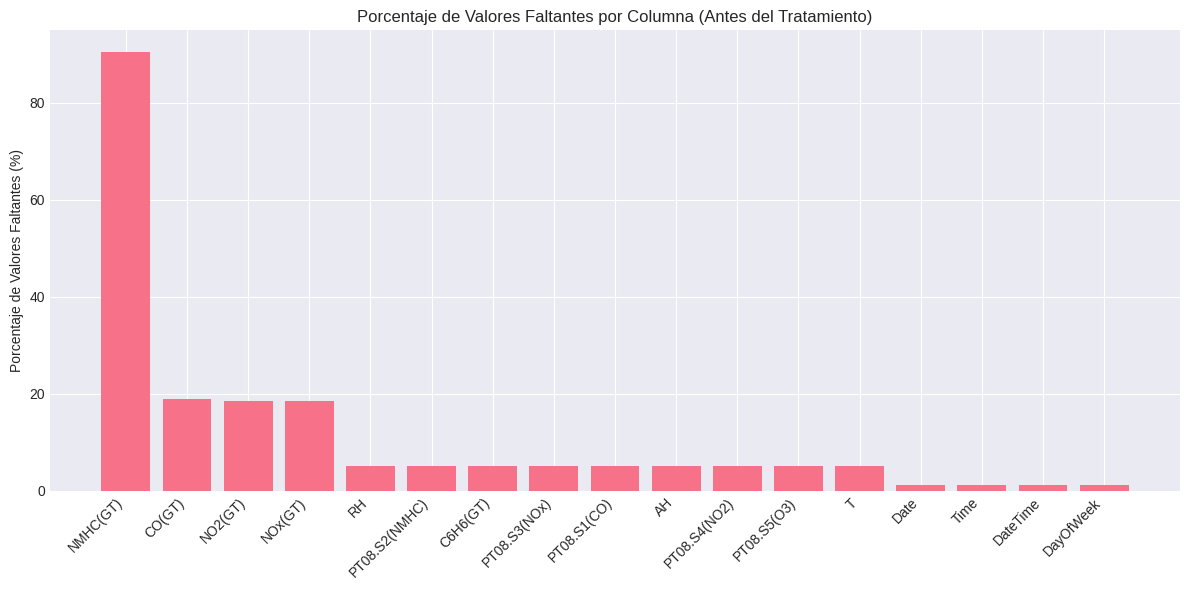


ESTADÍSTICAS DESCRIPTIVAS (ANTES DEL TRATAMIENTO)
                count                 mean                  min  \
CO(GT)         7674.0              2.15275                  0.1   
PT08.S1(CO)    8991.0          1099.833166                647.0   
NMHC(GT)        914.0           218.811816                  7.0   
C6H6(GT)       8991.0            10.083105                  0.1   
PT08.S2(NMHC)  8991.0           939.153376                383.0   
NOx(GT)        7718.0           246.896735                  2.0   
PT08.S3(NOx)   8991.0           835.493605                322.0   
NO2(GT)        7715.0           113.091251                  2.0   
PT08.S4(NO2)   8991.0          1456.264598                551.0   
PT08.S5(O3)    8991.0          1022.906128                221.0   
T              8991.0            18.317829                 -1.9   
RH             8991.0            49.234201                  9.2   
AH             8991.0              1.02553               0.1847   
DateTime   

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, anderson, kstest, norm
import warnings
warnings.filterwarnings('ignore')
# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

print("=" * 80)
print("ANÁLISIS EXPLORATORIO DE DATOS - CALIDAD DEL AIRE")
print("=" * 80)

# ============================================================================
# CARGAR Y LIMPIAR LOS DATOS
# ============================================================================
print("\n[1] CARGANDO DATOS...")

file="/content/drive/MyDrive/ClassFiles/AirQuality.csv"

df_original=pd.read_csv(file, sep=';', decimal=',',na_values=['', ' ', 'NA', 'N/A'])




print(f"✓ Datos cargados: {df_original.shape[0]} filas, {df_original.shape[1]} columnas")

# Eliminación de columnas vacias
df_original = df_original.dropna(axis=1, how='all')
print(f"✓ Después de eliminar columnas vacías: {df_original.shape[1]} columnas")

# Información general
print("\n" + "=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
print(df_original.info())

# ============================================================================
# CREAR VARIABLE DATETIME Y DAYOFWEEK
# ============================================================================
print("\n[2] CREANDO VARIABLES TEMPORALES...")

# Combinar Date y Time en una columna DateTime
df_original['DateTime'] = pd.to_datetime(df_original['Date'] + ' ' + df_original['Time'],
                                         format='%d/%m/%Y %H.%M.%S',
                                         errors='coerce')

# Crear la columna DayOfWeek
df_original['DayOfWeek'] = df_original['DateTime'].dt.day_name()

print(f"✓ Variables temporales creadas")
print(f"✓ Rango de fechas: {df_original['DateTime'].min()} a {df_original['DateTime'].max()}")


# ============================================================================
# IDENTIFICAR Y MANEJAR VALORES ESPECIALES (-200)
# ============================================================================
print("\n[3] IDENTIFICANDO VALORES ESPECIALES...")

# En este dataset, -200 representa valores faltantes
# Reemplazar -200 por NaN en columnas numéricas
numeric_cols = df_original.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col in df_original.columns:
        df_original[col] = df_original[col].replace(-200, np.nan)

print("✓ Valores -200 reemplazados por NaN")

# ============================================================================
# ANÁLISIS DE DATOS FALTANTES (ANTES DEL TRATAMIENTO)
# ============================================================================
print("\n" + "=" * 80)
print("ANÁLISIS DE DATOS FALTANTES (ANTES DEL TRATAMIENTO)")
print("=" * 80)

missing_data = pd.DataFrame({
    'Columna': df_original.columns,
    'Valores_Faltantes': df_original.isnull().sum(),
    'Porcentaje': (df_original.isnull().sum() / len(df_original) * 100).round(2)
})
missing_data = missing_data[missing_data['Valores_Faltantes'] > 0].sort_values('Porcentaje', ascending=False)
print(missing_data.to_string(index=False))

# Visualizar datos faltantes
plt.figure(figsize=(12, 6))
missing_pct = (df_original.isnull().sum() / len(df_original) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]
plt.bar(range(len(missing_pct)), missing_pct.values)
plt.xticks(range(len(missing_pct)), missing_pct.index, rotation=45, ha='right')
plt.ylabel('Porcentaje de Valores Faltantes (%)')
plt.title('Porcentaje de Valores Faltantes por Columna (Antes del Tratamiento)')
plt.tight_layout()
plt.show()






#Descripción de datos previo a manipulación

##Estadísticas descriptivas (Previo a tratamiento)

In [41]:
# ============================================================================
# ESTADÍSTICAS DESCRIPTIVAS (ANTES DEL TRATAMIENTO)
# ============================================================================
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS (ANTES DEL TRATAMIENTO)")
print("=" * 80)
print(df_original.describe().T)


ESTADÍSTICAS DESCRIPTIVAS (ANTES DEL TRATAMIENTO)
                count                 mean                  min  \
CO(GT)         7674.0              2.15275                  0.1   
PT08.S1(CO)    8991.0          1099.833166                647.0   
NMHC(GT)        914.0           218.811816                  7.0   
C6H6(GT)       8991.0            10.083105                  0.1   
PT08.S2(NMHC)  8991.0           939.153376                383.0   
NOx(GT)        7718.0           246.896735                  2.0   
PT08.S3(NOx)   8991.0           835.493605                322.0   
NO2(GT)        7715.0           113.091251                  2.0   
PT08.S4(NO2)   8991.0          1456.264598                551.0   
PT08.S5(O3)    8991.0          1022.906128                221.0   
T              8991.0            18.317829                 -1.9   
RH             8991.0            49.234201                  9.2   
AH             8991.0              1.02553               0.1847   
DateTime   

##EDA (Previo a tratamiento)


INICIANDO EDA - ANTES DEL TRATAMIENTO DE DATOS FALTANTES

Columnas numéricas para análisis: 13
['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

Generando histogramas y gráficas de densidad...


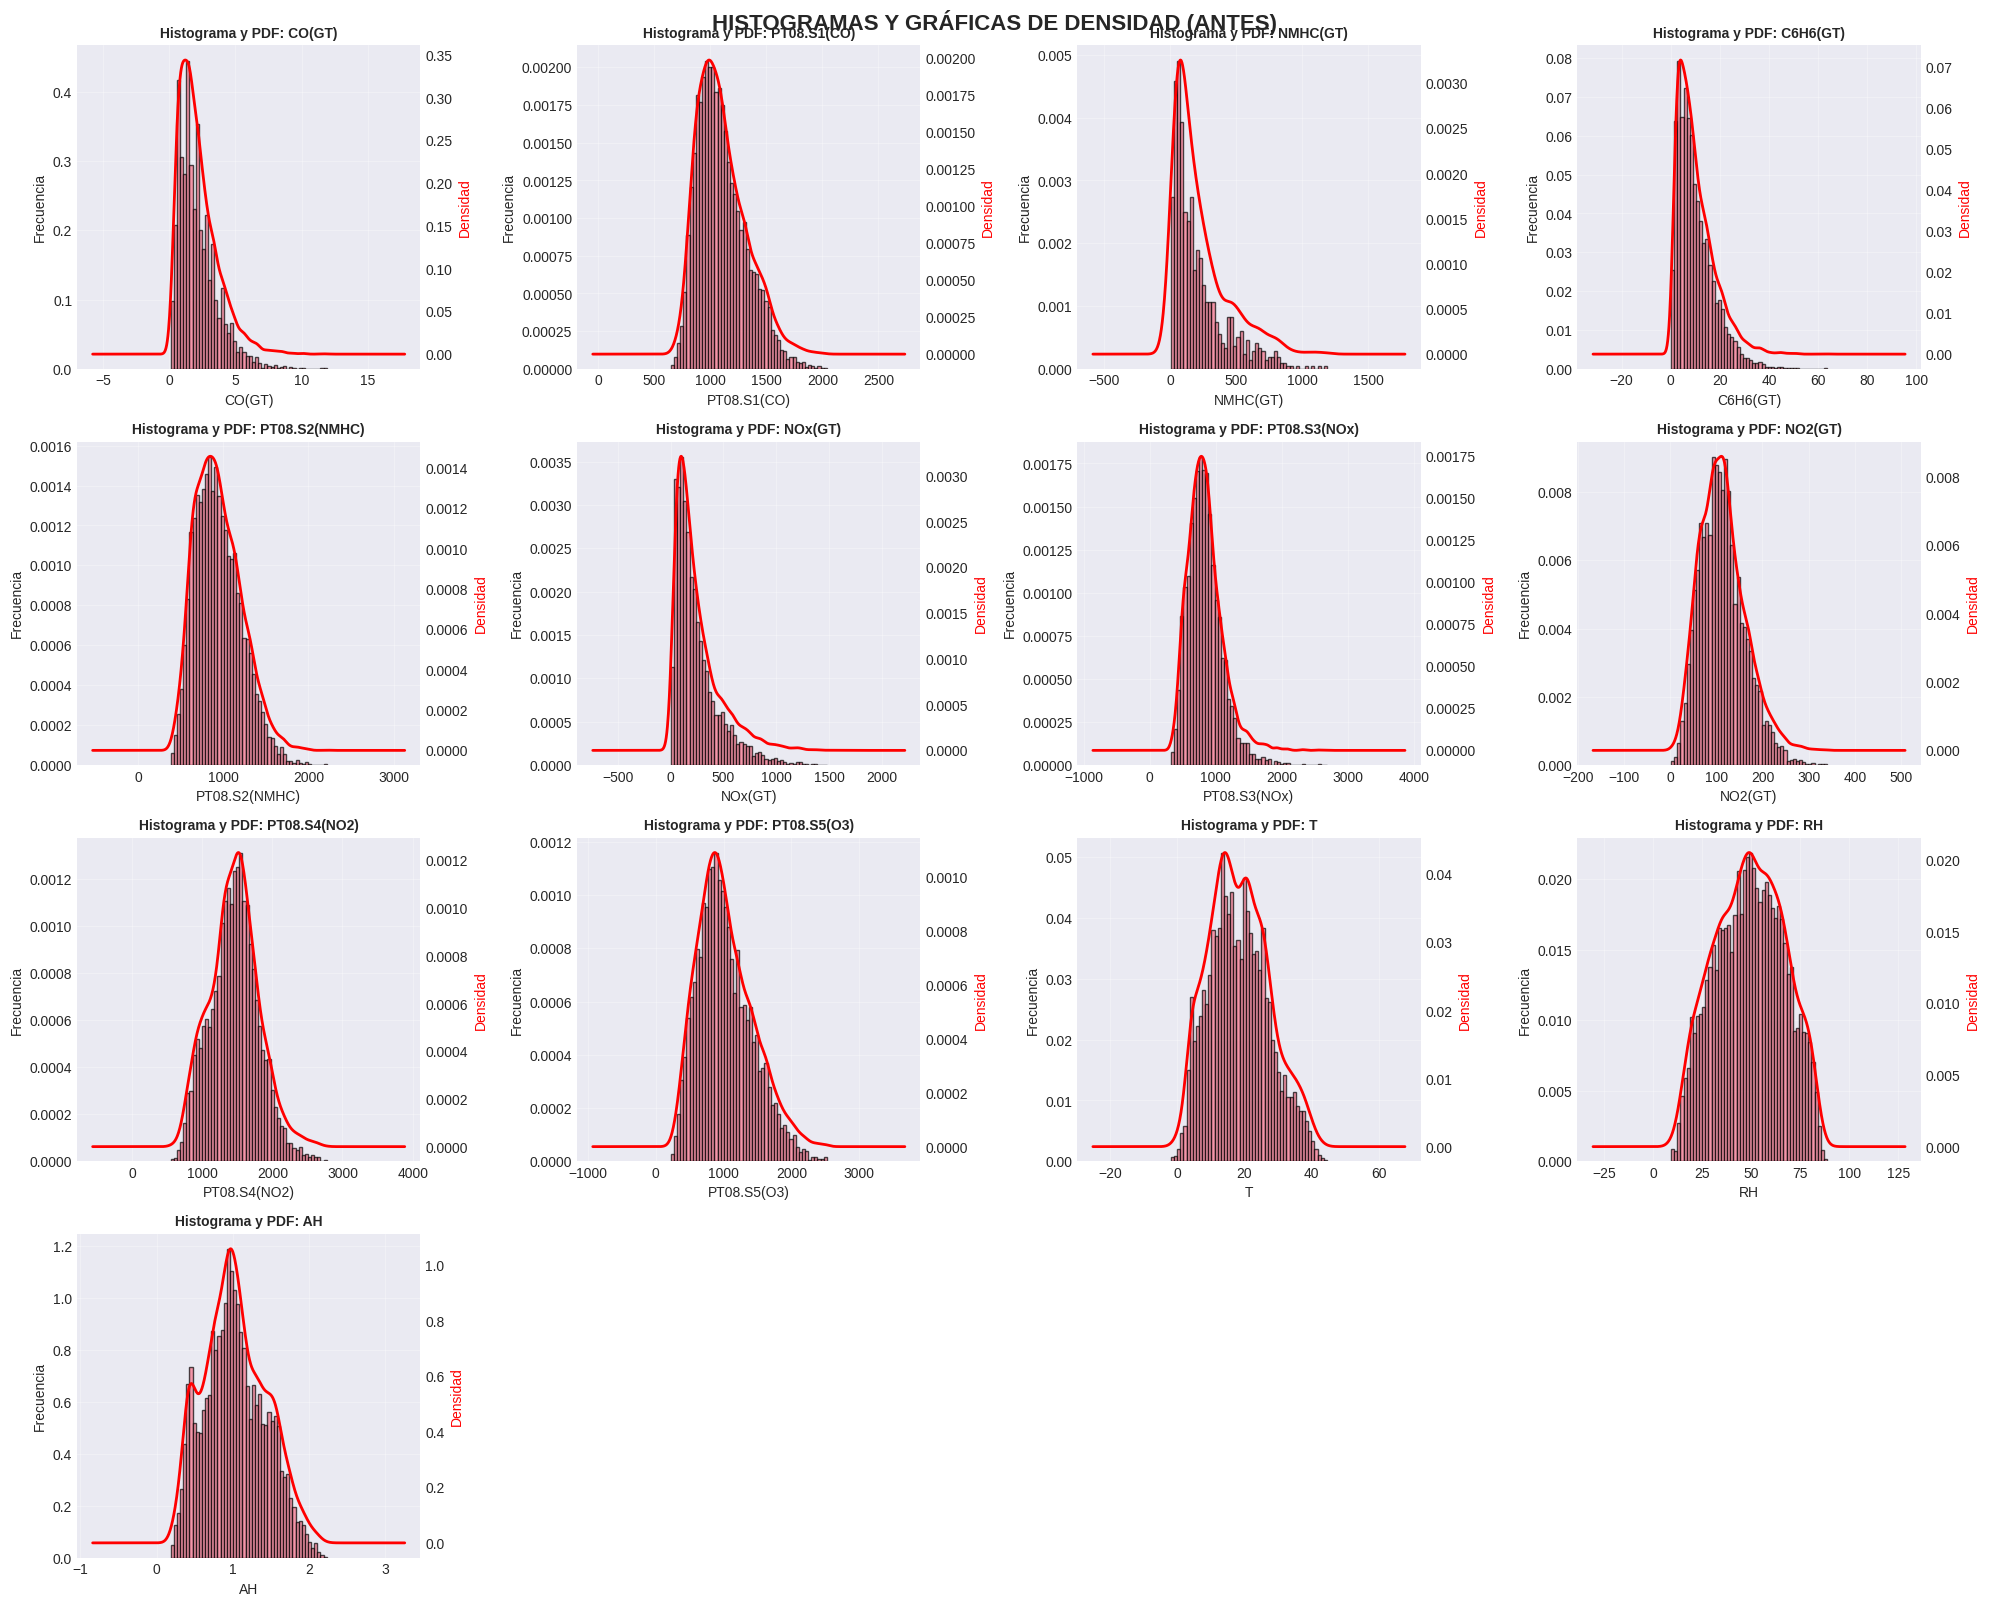


Generando gráficas de barras para DayOfWeek...


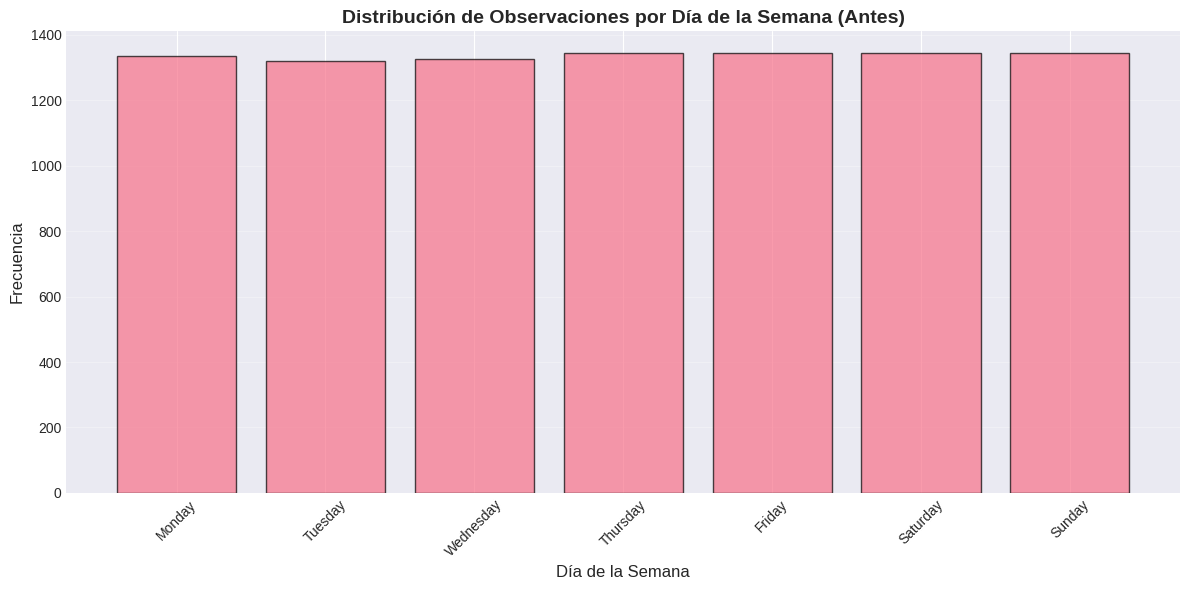


Generando boxplots para identificar outliers...


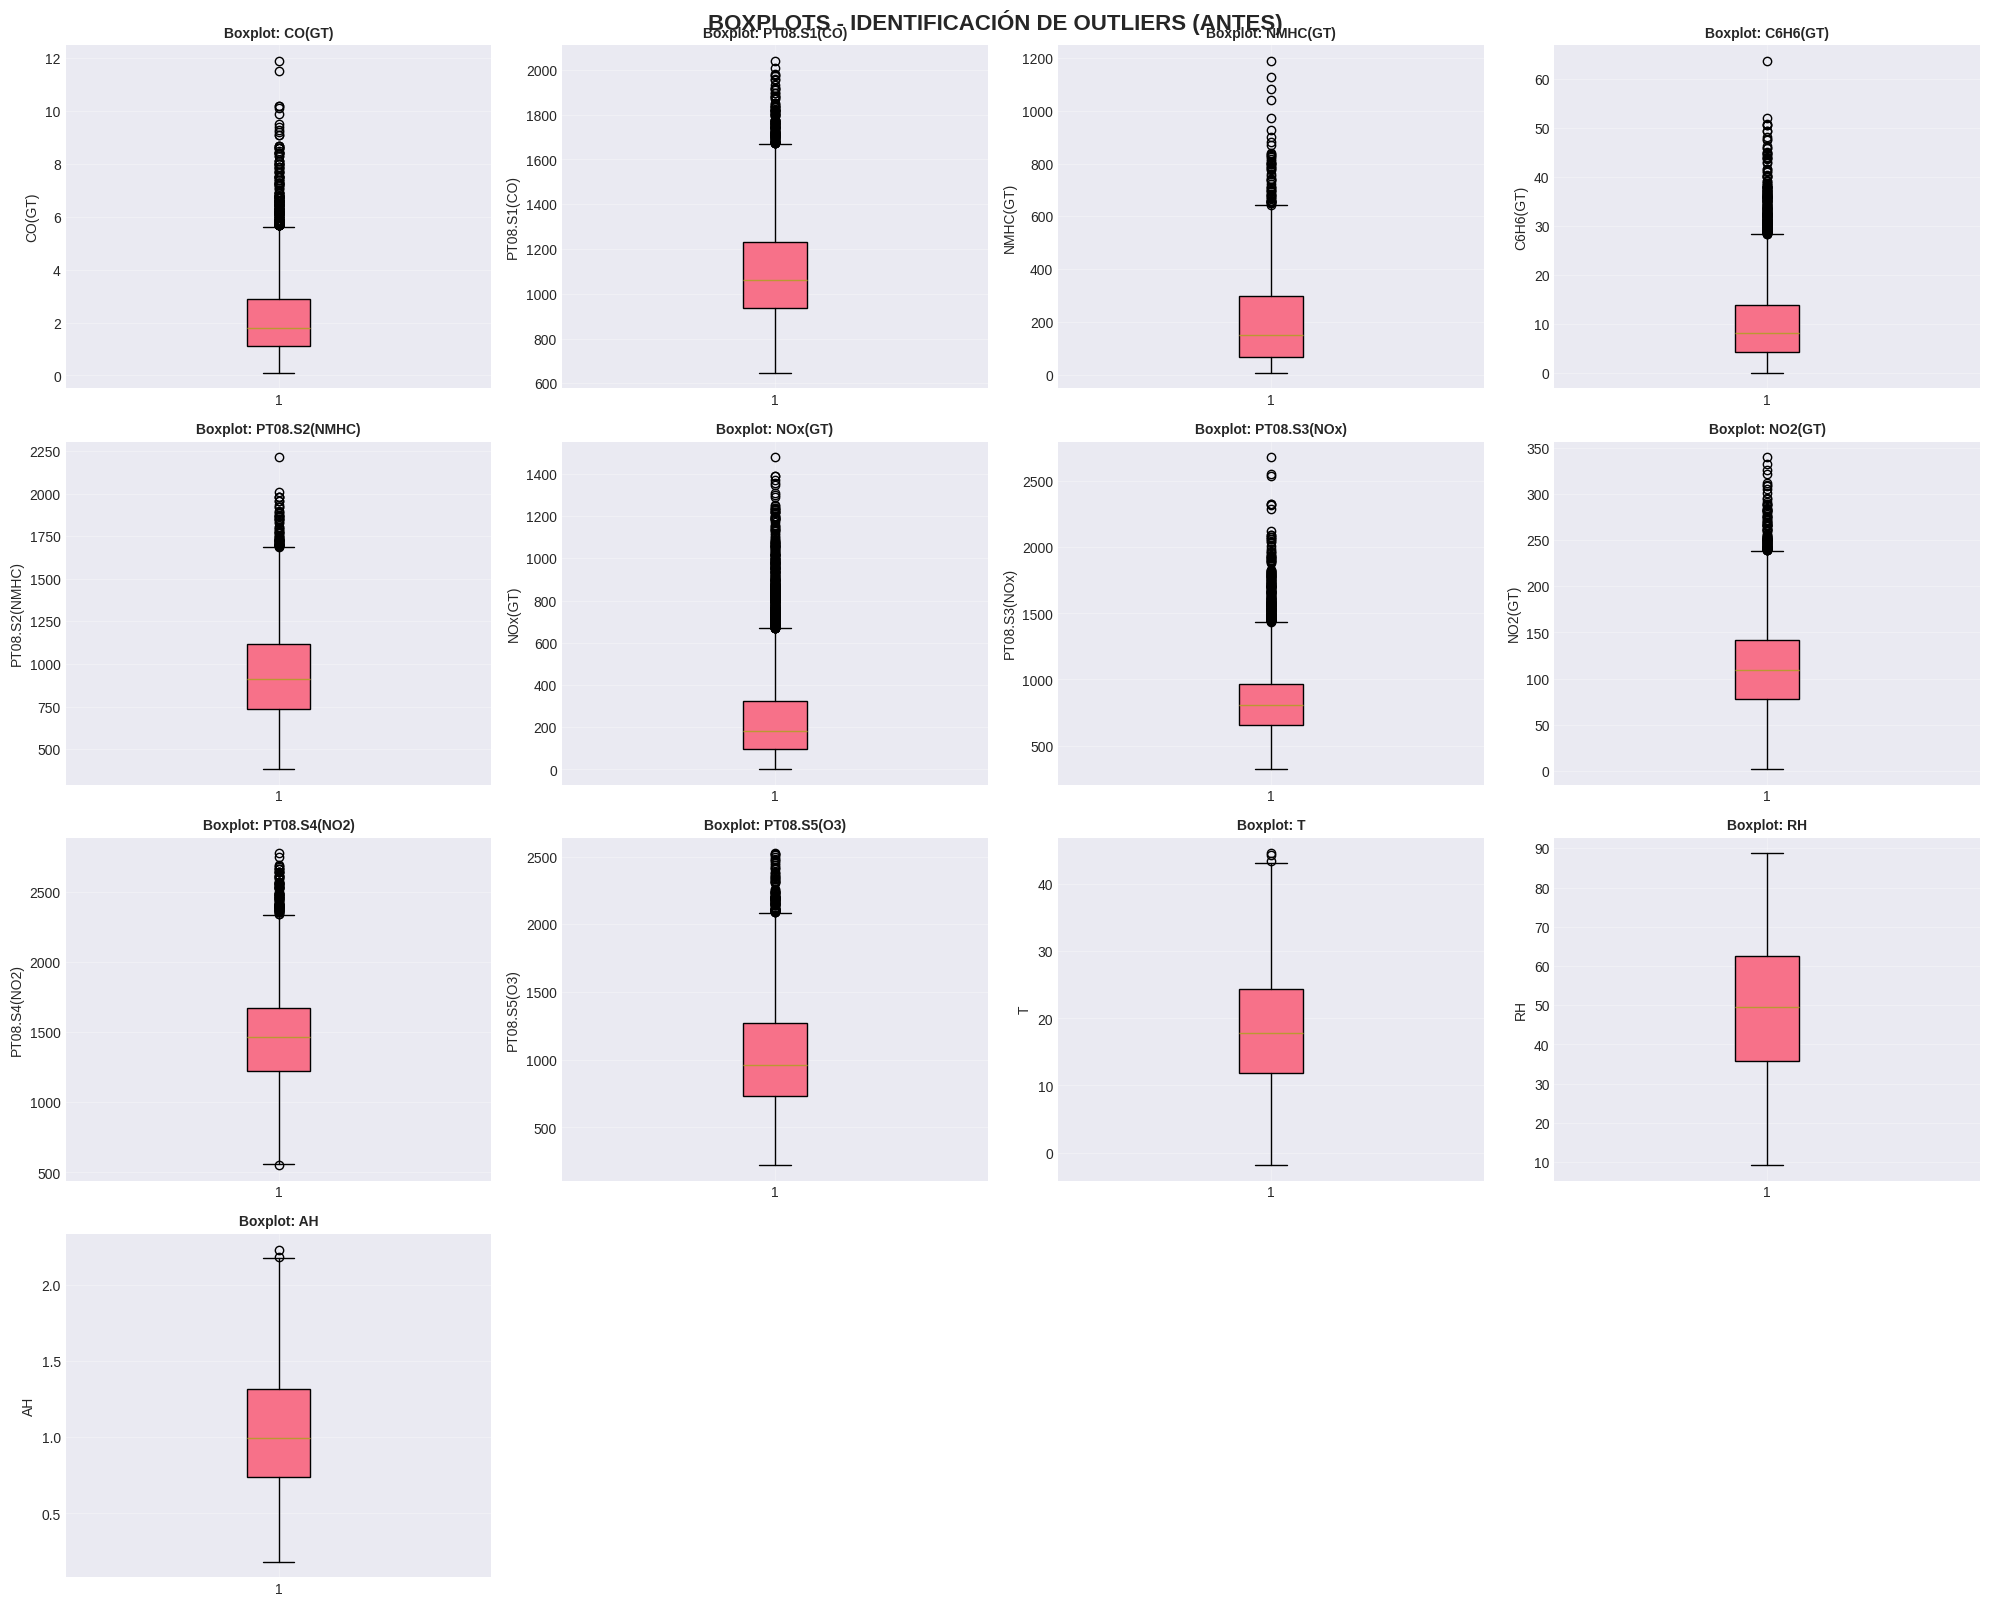


Conteo de Outliers por Columna (Método IQR):
      Columna  Num_Outliers Porcentaje
       CO(GT)           215      2.27%
  PT08.S1(CO)           118      1.25%
     NMHC(GT)            55      0.58%
     C6H6(GT)           228      2.41%
PT08.S2(NMHC)            65      0.69%
      NOx(GT)           435      4.59%
 PT08.S3(NOx)           241      2.54%
      NO2(GT)           107      1.13%
 PT08.S4(NO2)            97      1.02%
  PT08.S5(O3)            93      0.98%
            T             3      0.03%
           RH             0      0.00%
           AH             2      0.02%

Generando matriz de correlación y mapa de calor...


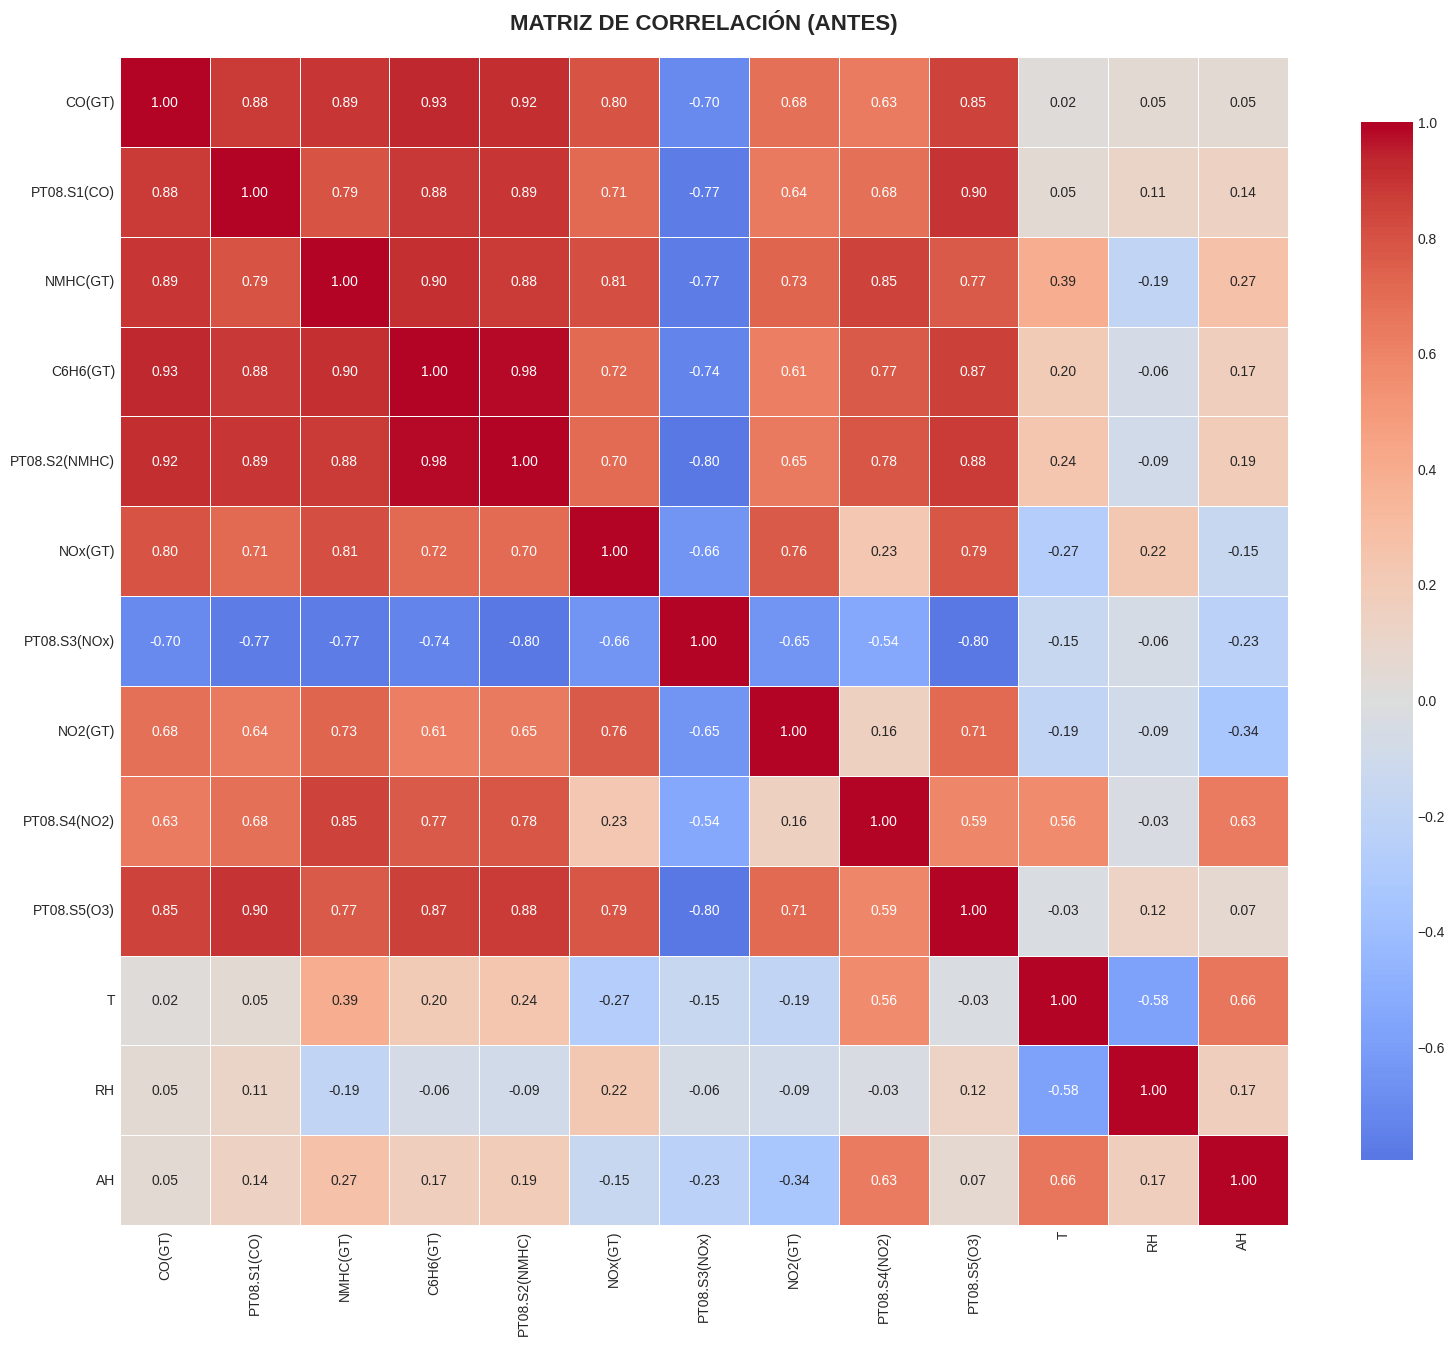


Correlaciones más fuertes (|r| > 0.7):
   Variable_1    Variable_2 Correlación
       CO(GT)   PT08.S1(CO)       0.879
       CO(GT)      NMHC(GT)       0.890
       CO(GT)      C6H6(GT)       0.931
       CO(GT) PT08.S2(NMHC)       0.916
       CO(GT)       NOx(GT)       0.795
       CO(GT)  PT08.S3(NOx)      -0.703
       CO(GT)   PT08.S5(O3)       0.854
  PT08.S1(CO)      NMHC(GT)       0.791
  PT08.S1(CO)      C6H6(GT)       0.884
  PT08.S1(CO) PT08.S2(NMHC)       0.893
  PT08.S1(CO)       NOx(GT)       0.714
  PT08.S1(CO)  PT08.S3(NOx)      -0.772
  PT08.S1(CO)   PT08.S5(O3)       0.899
     NMHC(GT)      C6H6(GT)       0.903
     NMHC(GT) PT08.S2(NMHC)       0.878
     NMHC(GT)       NOx(GT)       0.813
     NMHC(GT)  PT08.S3(NOx)      -0.771
     NMHC(GT)       NO2(GT)       0.731
     NMHC(GT)  PT08.S4(NO2)       0.853
     NMHC(GT)   PT08.S5(O3)       0.767
     C6H6(GT) PT08.S2(NMHC)       0.982
     C6H6(GT)       NOx(GT)       0.719
     C6H6(GT)  PT08.S3(NOx)      -0.736


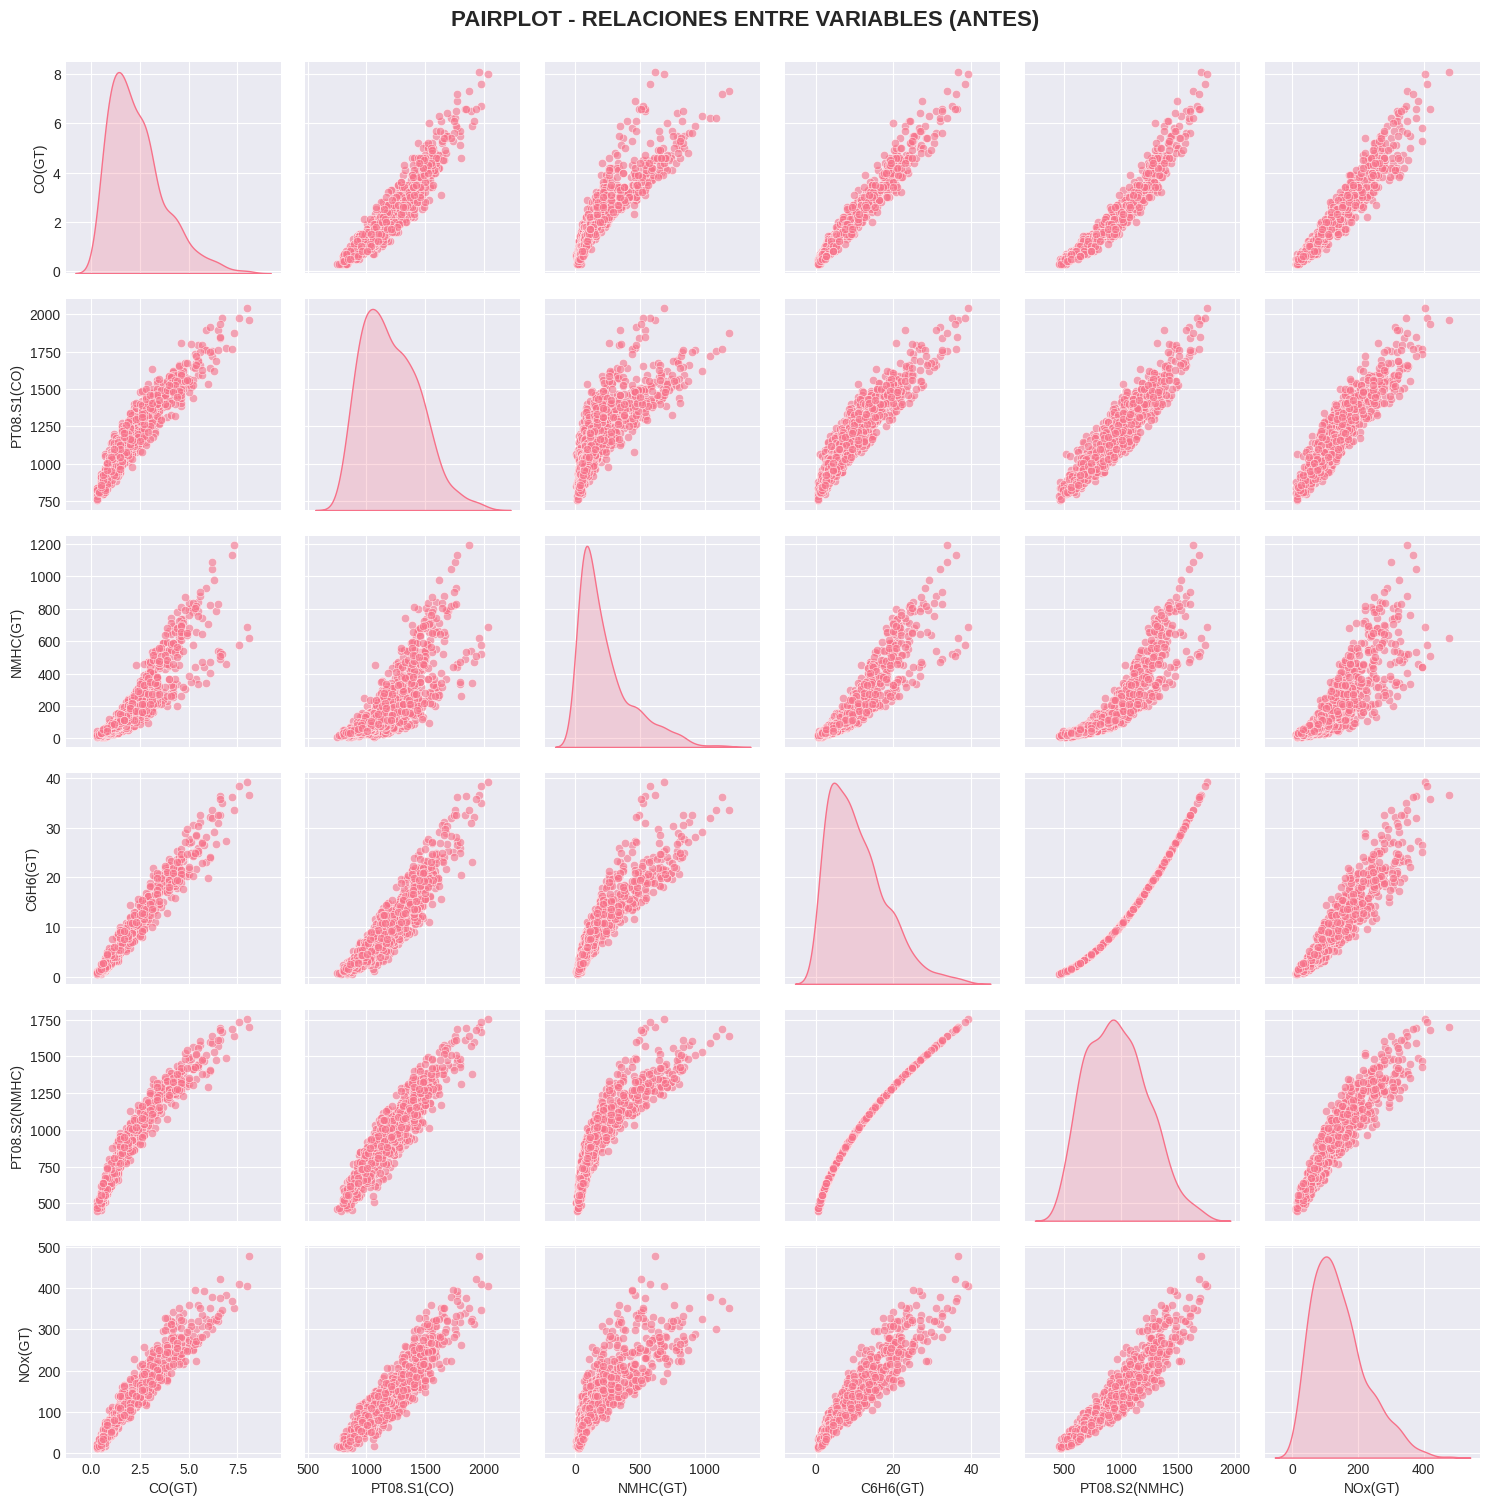


Realizando pruebas de normalidad...

Resultados de Pruebas de Normalidad:
      Columna Shapiro_W  Shapiro_p Normal_SW KS_stat        KS_p Normal_KS
       CO(GT)    0.8962 7.7741e-50         ✗  0.1092  3.6008e-80         ✗
  PT08.S1(CO)    0.9630 5.8006e-34         ✗  0.0688  1.7265e-37         ✗
     NMHC(GT)    0.8291 3.9097e-30         ✗  0.1531  3.5180e-19         ✗
     C6H6(GT)    0.8965 8.6293e-50         ✗  0.1062  9.9675e-89         ✗
PT08.S2(NMHC)    0.9769 1.0013e-27         ✗  0.0481  1.7343e-18         ✗
      NOx(GT)    0.8357 6.2069e-58         ✗  0.1415 2.5900e-135         ✗
 PT08.S3(NOx)    0.9439 5.4662e-40         ✗  0.0618  2.7252e-30         ✗
      NO2(GT)    0.9777 2.6367e-27         ✗  0.0485  3.5227e-16         ✗
 PT08.S4(NO2)    0.9935 2.3202e-14         ✗  0.0182  5.1408e-03         ✗
  PT08.S5(O3)    0.9714 1.7019e-30         ✗  0.0613  8.2799e-30         ✗
            T    0.9864 1.3983e-21         ✗  0.0400  6.1420e-13         ✗
           RH    0.9850 1

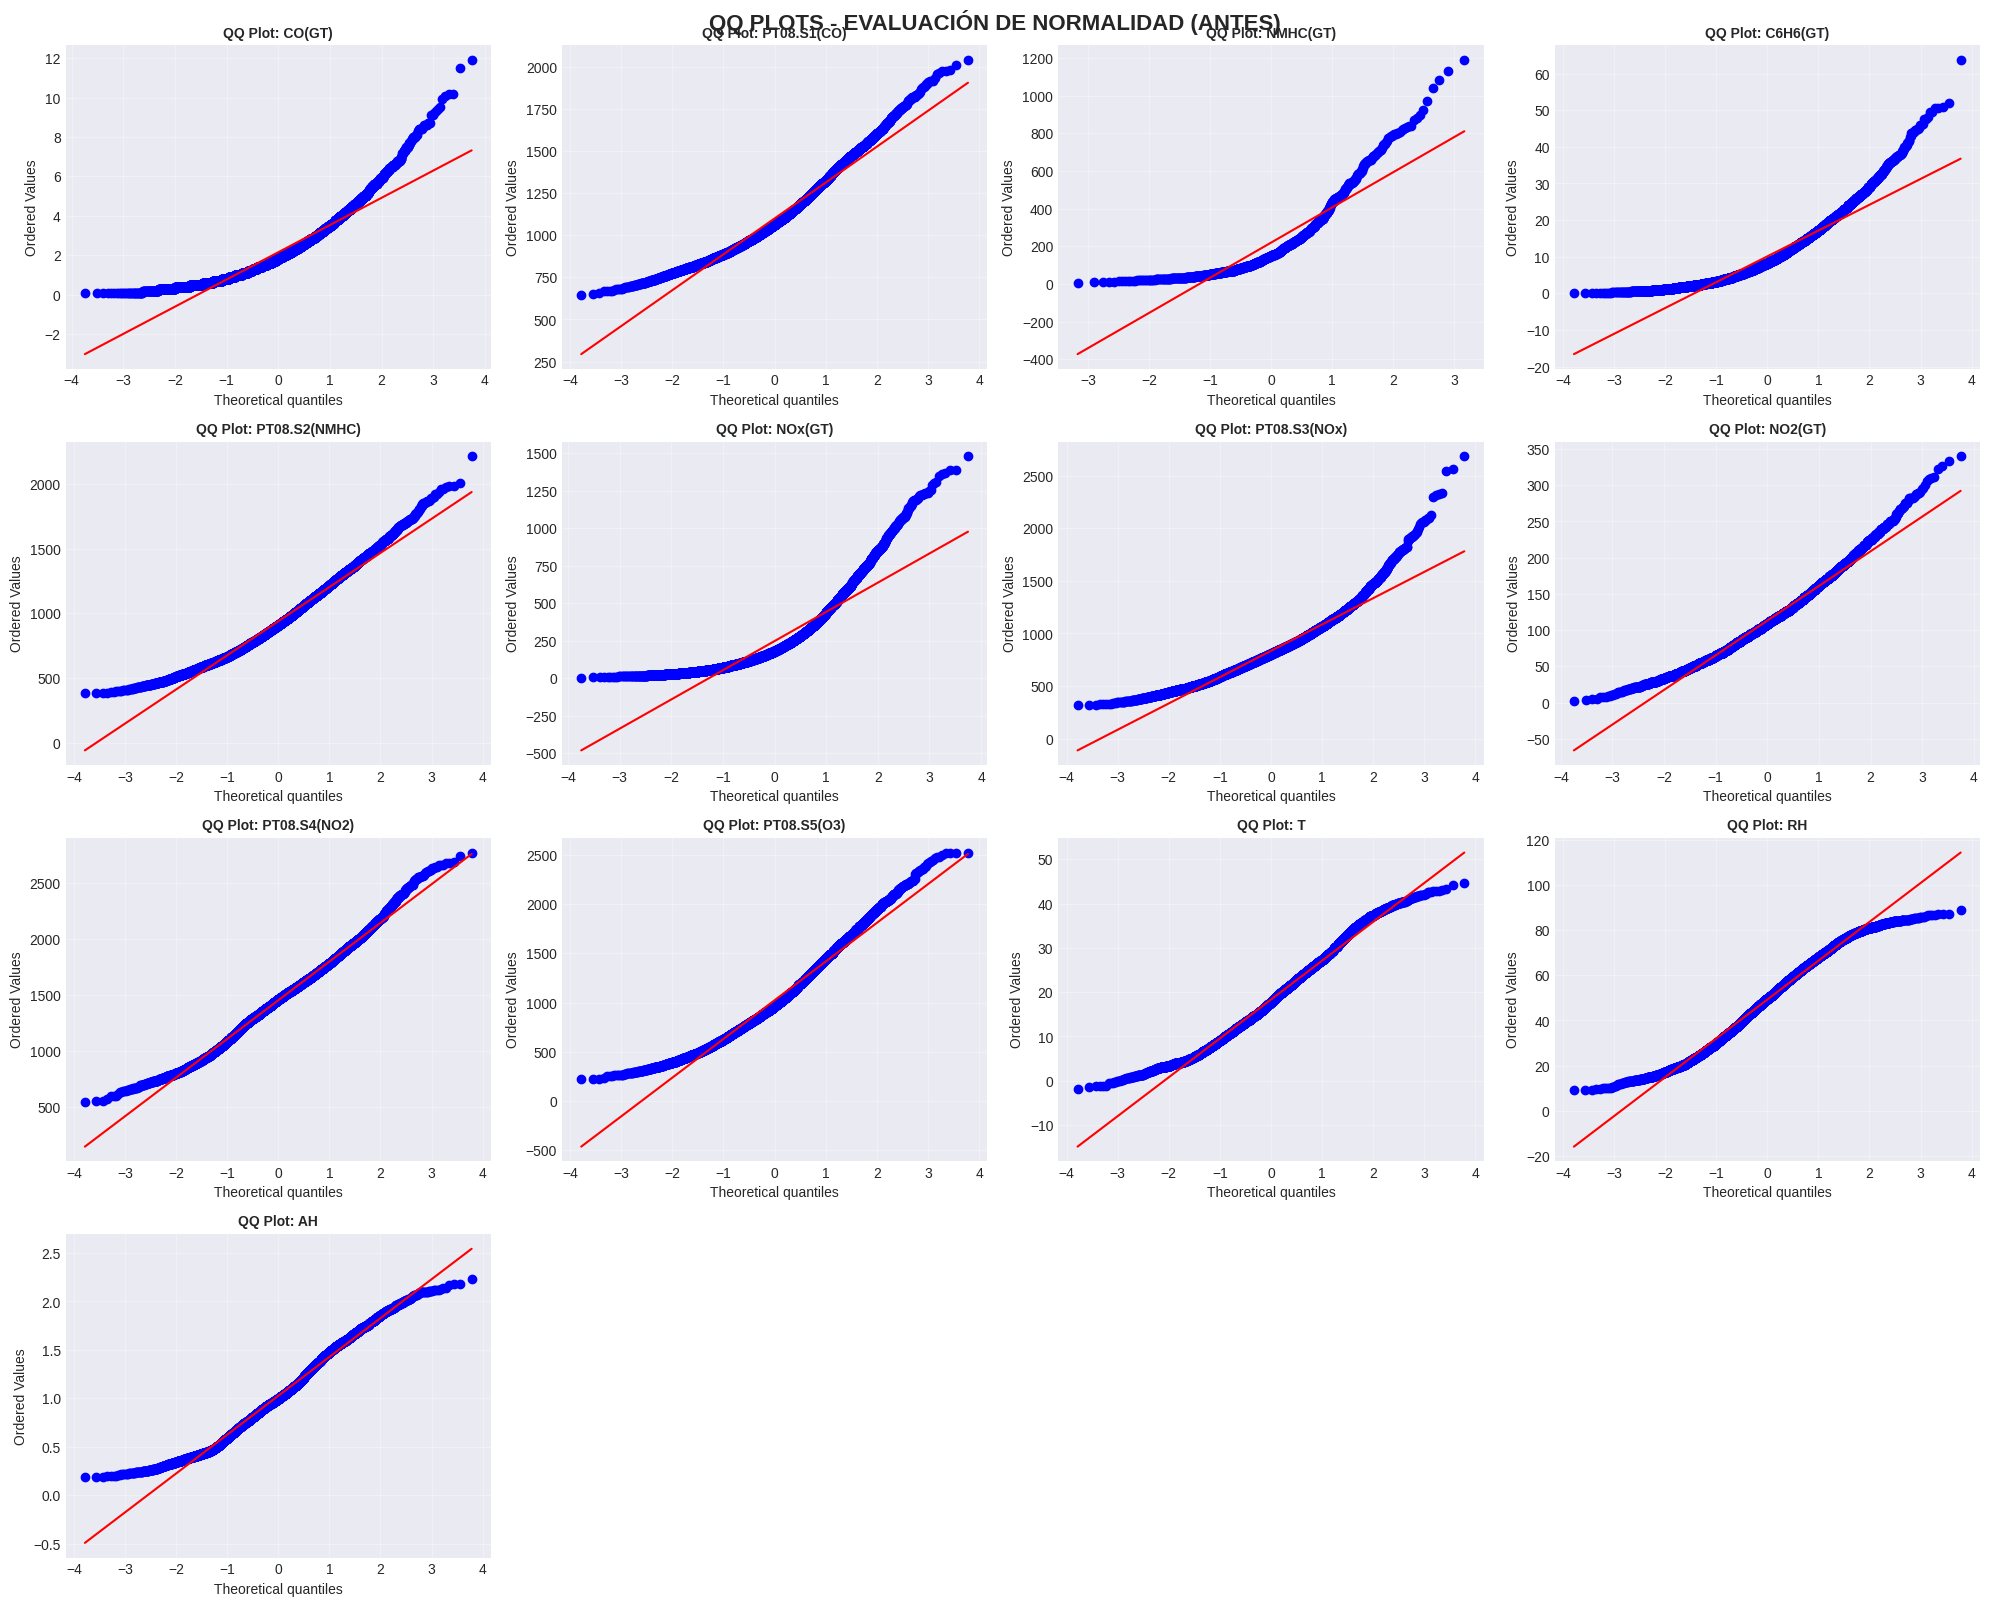

In [49]:
# ============================================================================
# ANÁLISIS EXPLORATORIO DE DATOS (EDA) - ANTES DEL TRATAMIENTO
# ============================================================================
print("\n" + "=" * 80)
print("INICIANDO EDA - ANTES DEL TRATAMIENTO DE DATOS FALTANTES")
print("=" * 80)

# Seleccionar solo columnas numéricas (excluyendo DateTime)
numeric_columns = df_original.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nColumnas numéricas para análisis: {len(numeric_columns)}")
print(numeric_columns)

# --- HISTOGRAMAS Y DENSIDAD  ---
print("\nGenerando histogramas y gráficas de densidad...")

n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns):
    axes[idx].hist(df_original[col].dropna(), bins=50, edgecolor='black', alpha=0.7, density=True)

    # Superponer curva de densidad
    try:
        df_original[col].dropna().plot(kind='kde', ax=axes[idx], secondary_y=True, color='red', linewidth=2)
        axes[idx].right_ax.set_ylabel('Densidad', color='red')
    except:
        pass

    axes[idx].set_title(f'Histograma y PDF: {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(alpha=0.3)

# Ocultar ejes sobrantes
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('HISTOGRAMAS Y GRÁFICAS DE DENSIDAD (ANTES)', fontsize=16, y=1.001, fontweight='bold')
plt.show()

# ---GRÁFICAS DE BARRAS PARA VARIABLES CATEGÓRICAS ---
print("\nGenerando gráficas de barras para DayOfWeek...")

plt.figure(figsize=(12, 6))
day_counts = df_original['DayOfWeek'].value_counts()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(days_order)
plt.bar(day_counts.index, day_counts.values, edgecolor='black', alpha=0.7)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Observaciones por Día de la Semana (Antes)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# --- BOXPLOTS PARA IDENTIFICAR OUTLIERS ---
print("\nGenerando boxplots para identificar outliers...")

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns):
    axes[idx].boxplot(df_original[col].dropna(), vert=True, patch_artist=True)
    axes[idx].set_title(f'Boxplot: {col}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(alpha=0.3)

for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('BOXPLOTS - IDENTIFICACIÓN DE OUTLIERS (ANTES)', fontsize=16, y=1.001, fontweight='bold')
plt.show()

# Contar outliers usando IQR
print("\nConteo de Outliers por Columna (Método IQR):")
outlier_summary = []
for col in numeric_columns:
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_original[(df_original[col] < lower_bound) | (df_original[col] > upper_bound)][col]
    outlier_summary.append({
        'Columna': col,
        'Num_Outliers': len(outliers),
        'Porcentaje': f"{(len(outliers) / len(df_original) * 100):.2f}%"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

# --- MATRIZ DE CORRELACIÓN Y MAPA DE CALOR ---
print("\nGenerando matriz de correlación y mapa de calor...")

correlation_matrix = df_original[numeric_columns].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('MATRIZ DE CORRELACIÓN (ANTES)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes
print("\nCorrelaciones más fuertes (|r| > 0.7):")
threshold = 0.7
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            strong_corr.append({
                'Variable_1': correlation_matrix.columns[i],
                'Variable_2': correlation_matrix.columns[j],
                'Correlación': f"{correlation_matrix.iloc[i, j]:.3f}"
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr)
    print(strong_corr_df.to_string(index=False))
else:
    print("No se encontraron correlaciones > 0.7")

# --- PAIRPLOT ---
print("\nGenerando pairplot (puede tardar unos minutos)...")

# Seleccionar un subconjunto de variables para el pairplot (para evitar sobrecarga)
selected_vars = numeric_columns[:6] if len(numeric_columns) > 6 else numeric_columns

pairplot_data = df_original[selected_vars].dropna()
sns.pairplot(pairplot_data, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('PAIRPLOT - RELACIONES ENTRE VARIABLES (ANTES)', y=1.001, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# --- PRUEBAS DE NORMALIDAD ---
print("\nRealizando pruebas de normalidad...")

normality_results = []

for col in numeric_columns:
    data = df_original[col].dropna()

    if len(data) < 3:
        continue

    # Test de Shapiro-Wilk (mejor para n < 5000)
    if len(data) <= 5000:
        stat_sw, p_sw = shapiro(data)
    else:
        # Para muestras grandes, tomar una muestra aleatoria
        sample_data = data.sample(n=5000, random_state=42)
        stat_sw, p_sw = shapiro(sample_data)

    # Test de Anderson-Darling
    result_ad = anderson(data, dist='norm')

    # Test de Kolmogorov-Smirnov
    stat_ks, p_ks = kstest(data, 'norm', args=(data.mean(), data.std()))

    normality_results.append({
        'Columna': col,
        'Shapiro_W': f"{stat_sw:.4f}",
        'Shapiro_p': f"{p_sw:.4e}",
        'Normal_SW': '✓' if p_sw > 0.05 else '✗',
        'KS_stat': f"{stat_ks:.4f}",
        'KS_p': f"{p_ks:.4e}",
        'Normal_KS': '✓' if p_ks > 0.05 else '✗'
    })

normality_df = pd.DataFrame(normality_results)
print("\nResultados de Pruebas de Normalidad:")
print(normality_df.to_string(index=False))
print("\nNota: ✓ = Sigue distribución normal (p > 0.05), ✗ = No sigue distribución normal")

# --- QQ PLOTS ---
print("\n Generando QQ plots...")

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns):
    data = df_original[col].dropna()
    stats.probplot(data, dist="norm", plot=axes[idx])
    axes[idx].set_title(f'QQ Plot: {col}', fontsize=10, fontweight='bold')
    axes[idx].grid(alpha=0.3)

for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('QQ PLOTS - EVALUACIÓN DE NORMALIDAD (ANTES)', fontsize=16, y=1.001, fontweight='bold')
plt.show()


#Tratamiento de datos faltantes

In [51]:
# ============================================================================
# TRATAMIENTO DE DATOS FALTANTES
# ============================================================================
print("\n" + "=" * 80)
print("TRATAMIENTO DE DATOS FALTANTES")
print("=" * 80)

# Crear una copia del dataframe para el tratamiento
df_treated = df_original.copy()

print("\n[8.1] ESTRATEGIA DE IMPUTACIÓN:")
print("-" * 80)
print("Se utilizarán las siguientes estrategias:")
print("• Variables numéricas con pocos faltantes Imputación por MEDIANA")
print("• Variables categóricas: Imputación por MODA")
print("• Filas con demasiados valores faltantes: ELIMINACIÓN")
print("-" * 80)

# Eliminar filas donde todas las columnas numéricas son NaN
threshold = 0.7  # Eliminar filas con más del 70% de valores faltantes
df_treated = df_treated.dropna(thresh=len(numeric_columns) * threshold, subset=numeric_columns)

print(f"\n✓ Filas eliminadas por exceso de valores faltantes: {len(df_original) - len(df_treated)}")

# Imputación por mediana para columnas numéricas
for col in numeric_columns:
    if col in df_treated.columns:
        median_value = df_treated[col].median()
        missing_count = df_treated[col].isnull().sum()
        df_treated[col].fillna(median_value, inplace=True)
        if missing_count > 0:
            print(f"  • {col}: {missing_count} valores imputados con mediana = {median_value:.2f}")

# Imputación por moda para DayOfWeek si tiene valores faltantes
if df_treated['DayOfWeek'].isnull().sum() > 0:
    mode_value = df_treated['DayOfWeek'].mode()[0]
    missing_count = df_treated['DayOfWeek'].isnull().sum()
    df_treated['DayOfWeek'].fillna(mode_value, inplace=True)
    print(f"  • DayOfWeek: {missing_count} valores imputados con moda = {mode_value}")

print(f"\n✓ Tratamiento completado")
print(f"✓ Forma del dataset después del tratamiento: {df_treated.shape}")

# Verificar que no queden valores faltantes
print("\nVerificación de valores faltantes después del tratamiento:")
remaining_missing = df_treated.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
if len(remaining_missing) == 0:
    print("✓ ¡No quedan valores faltantes!")
else:
    print(remaining_missing)


TRATAMIENTO DE DATOS FALTANTES

[8.1] ESTRATEGIA DE IMPUTACIÓN:
--------------------------------------------------------------------------------
Se utilizarán las siguientes estrategias:
• Variables numéricas con pocos faltantes Imputación por MEDIANA
• Variables categóricas: Imputación por MODA
• Filas con demasiados valores faltantes: ELIMINACIÓN
--------------------------------------------------------------------------------

✓ Filas eliminadas por exceso de valores faltantes: 1675
  • CO(GT): 452 valores imputados con mediana = 1.80
  • NMHC(GT): 6909 valores imputados con mediana = 145.00
  • NOx(GT): 400 valores imputados con mediana = 178.00
  • NO2(GT): 403 valores imputados con mediana = 109.00

✓ Tratamiento completado
✓ Forma del dataset después del tratamiento: (7796, 17)

Verificación de valores faltantes después del tratamiento:
✓ ¡No quedan valores faltantes!


##EDA (Posterior a tratamiento)


EDA DESPUÉS DEL TRATAMIENTO DE DATOS FALTANTES

ESTADÍSTICAS DESCRIPTIVAS (DESPUÉS DEL TRATAMIENTO):
                count                           mean                  min  \
CO(GT)         7796.0                       2.110595                  0.1   
PT08.S1(CO)    7796.0                    1103.733581                647.0   
NMHC(GT)       7796.0                     153.374808                  7.0   
C6H6(GT)       7796.0                      10.111775                  0.1   
PT08.S2(NMHC)  7796.0                     940.374936                383.0   
NOx(GT)        7796.0                     238.895844                  2.0   
PT08.S3(NOx)   7796.0                     833.622242                322.0   
NO2(GT)        7796.0                     111.982555                  2.0   
PT08.S4(NO2)   7796.0                    1444.605952                551.0   
PT08.S5(O3)    7796.0                    1032.922781                221.0   
T              7796.0                      17.96820

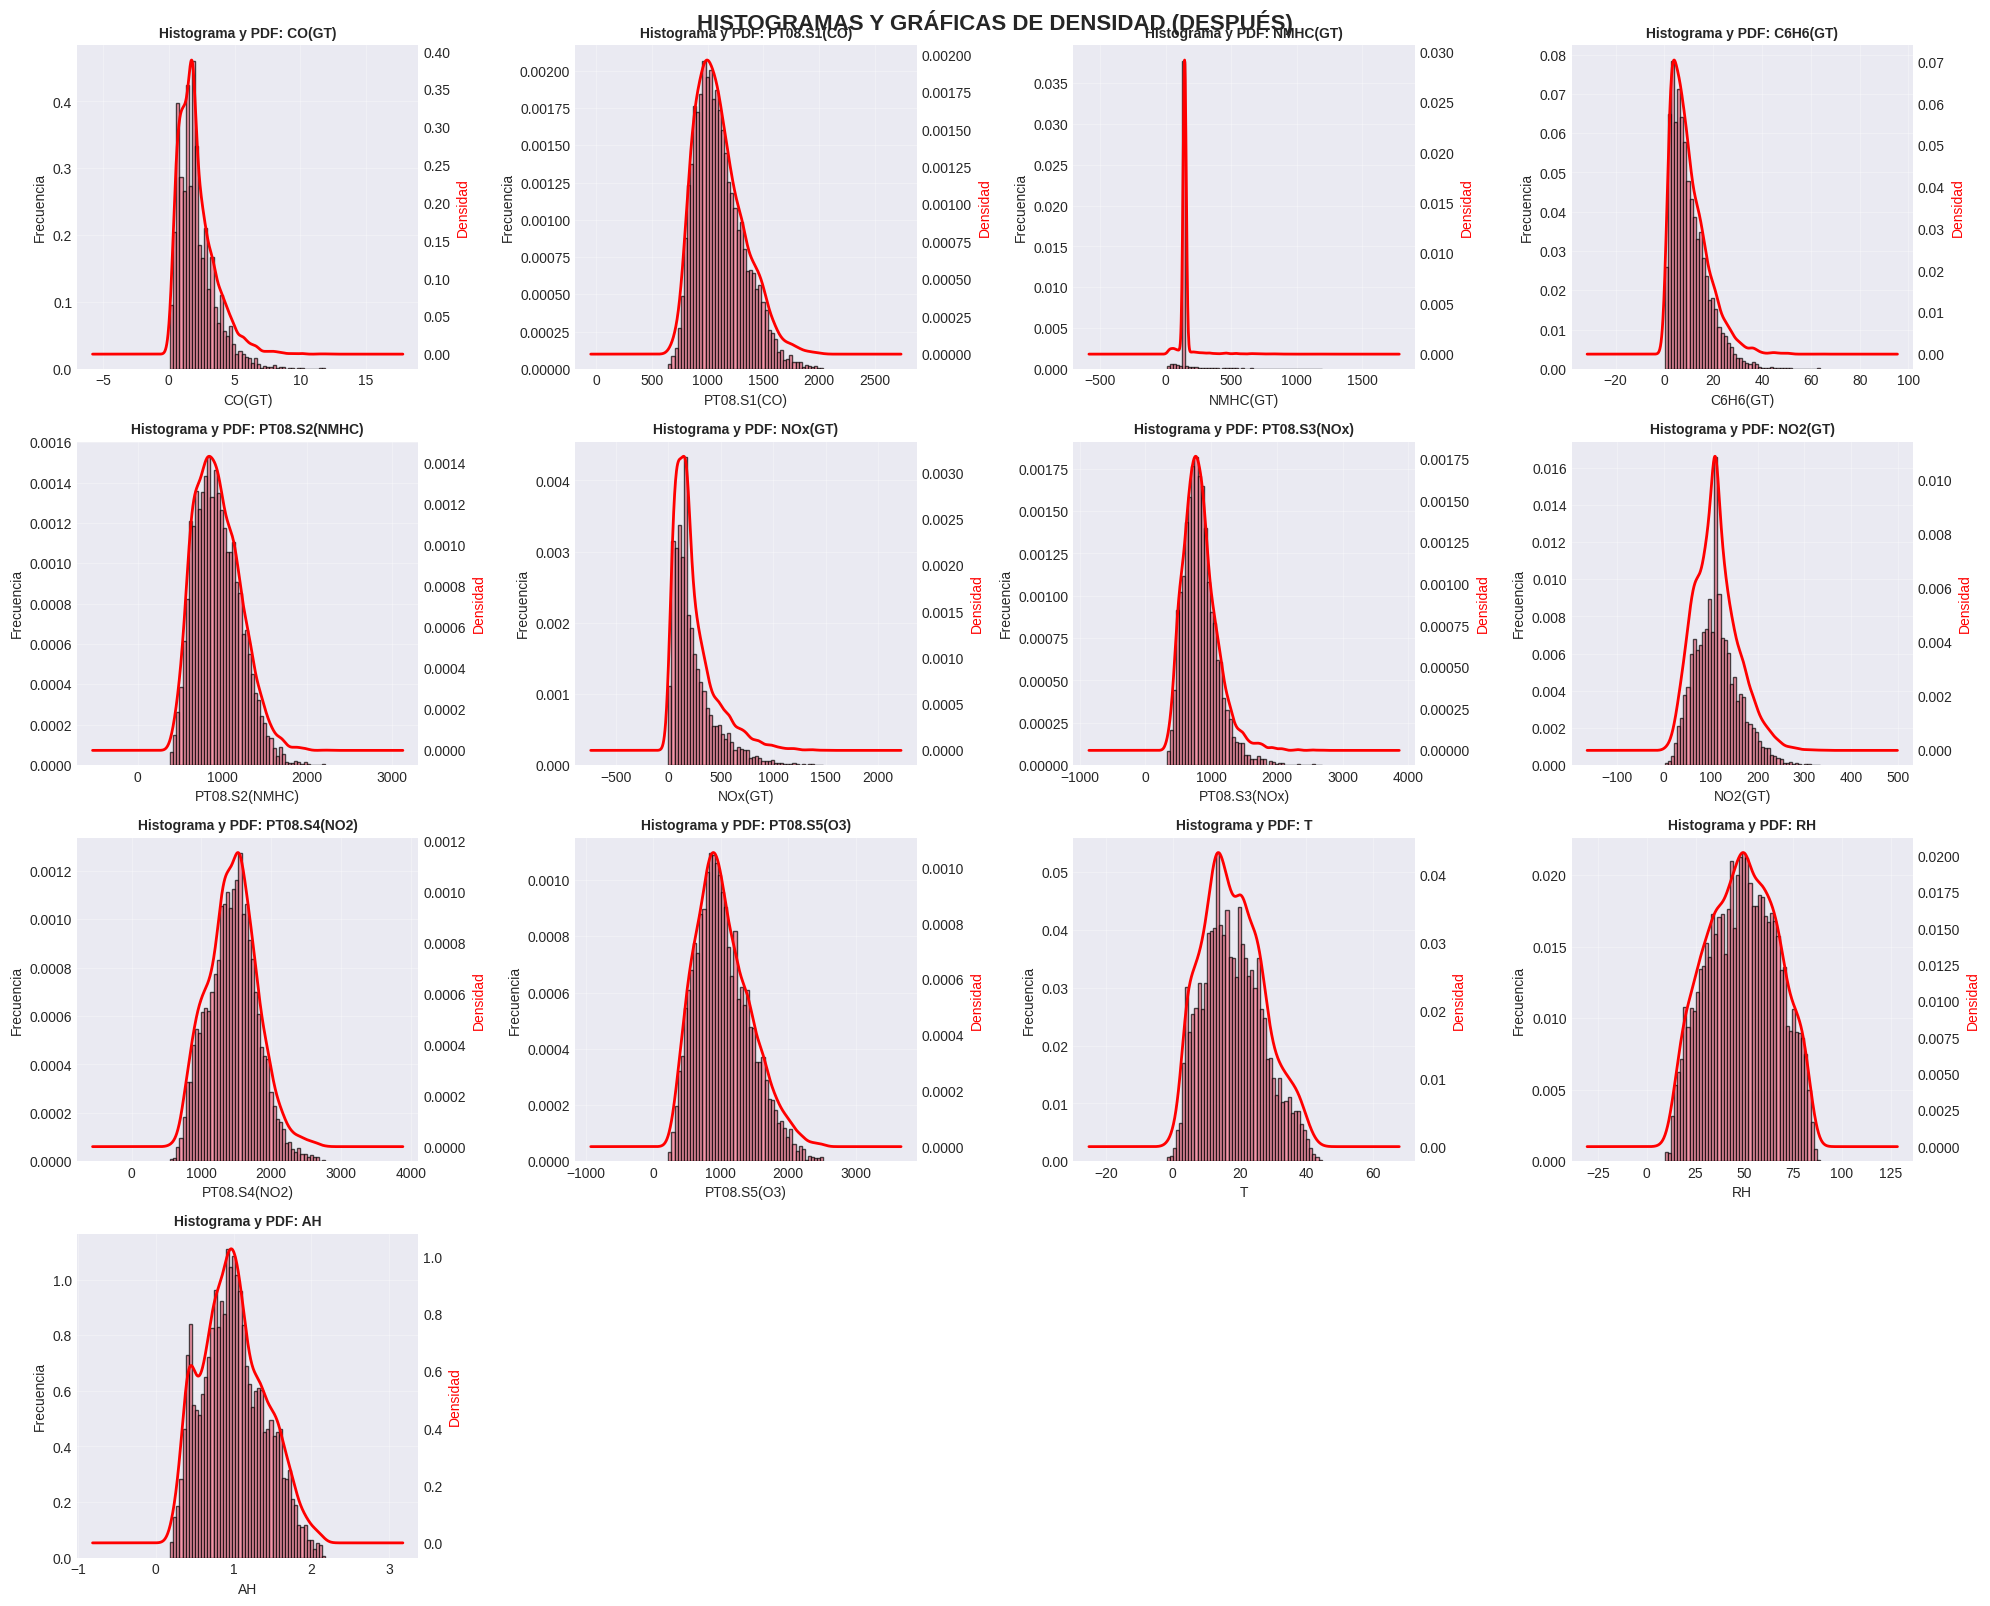


[9.3] Generando boxplots (después)...


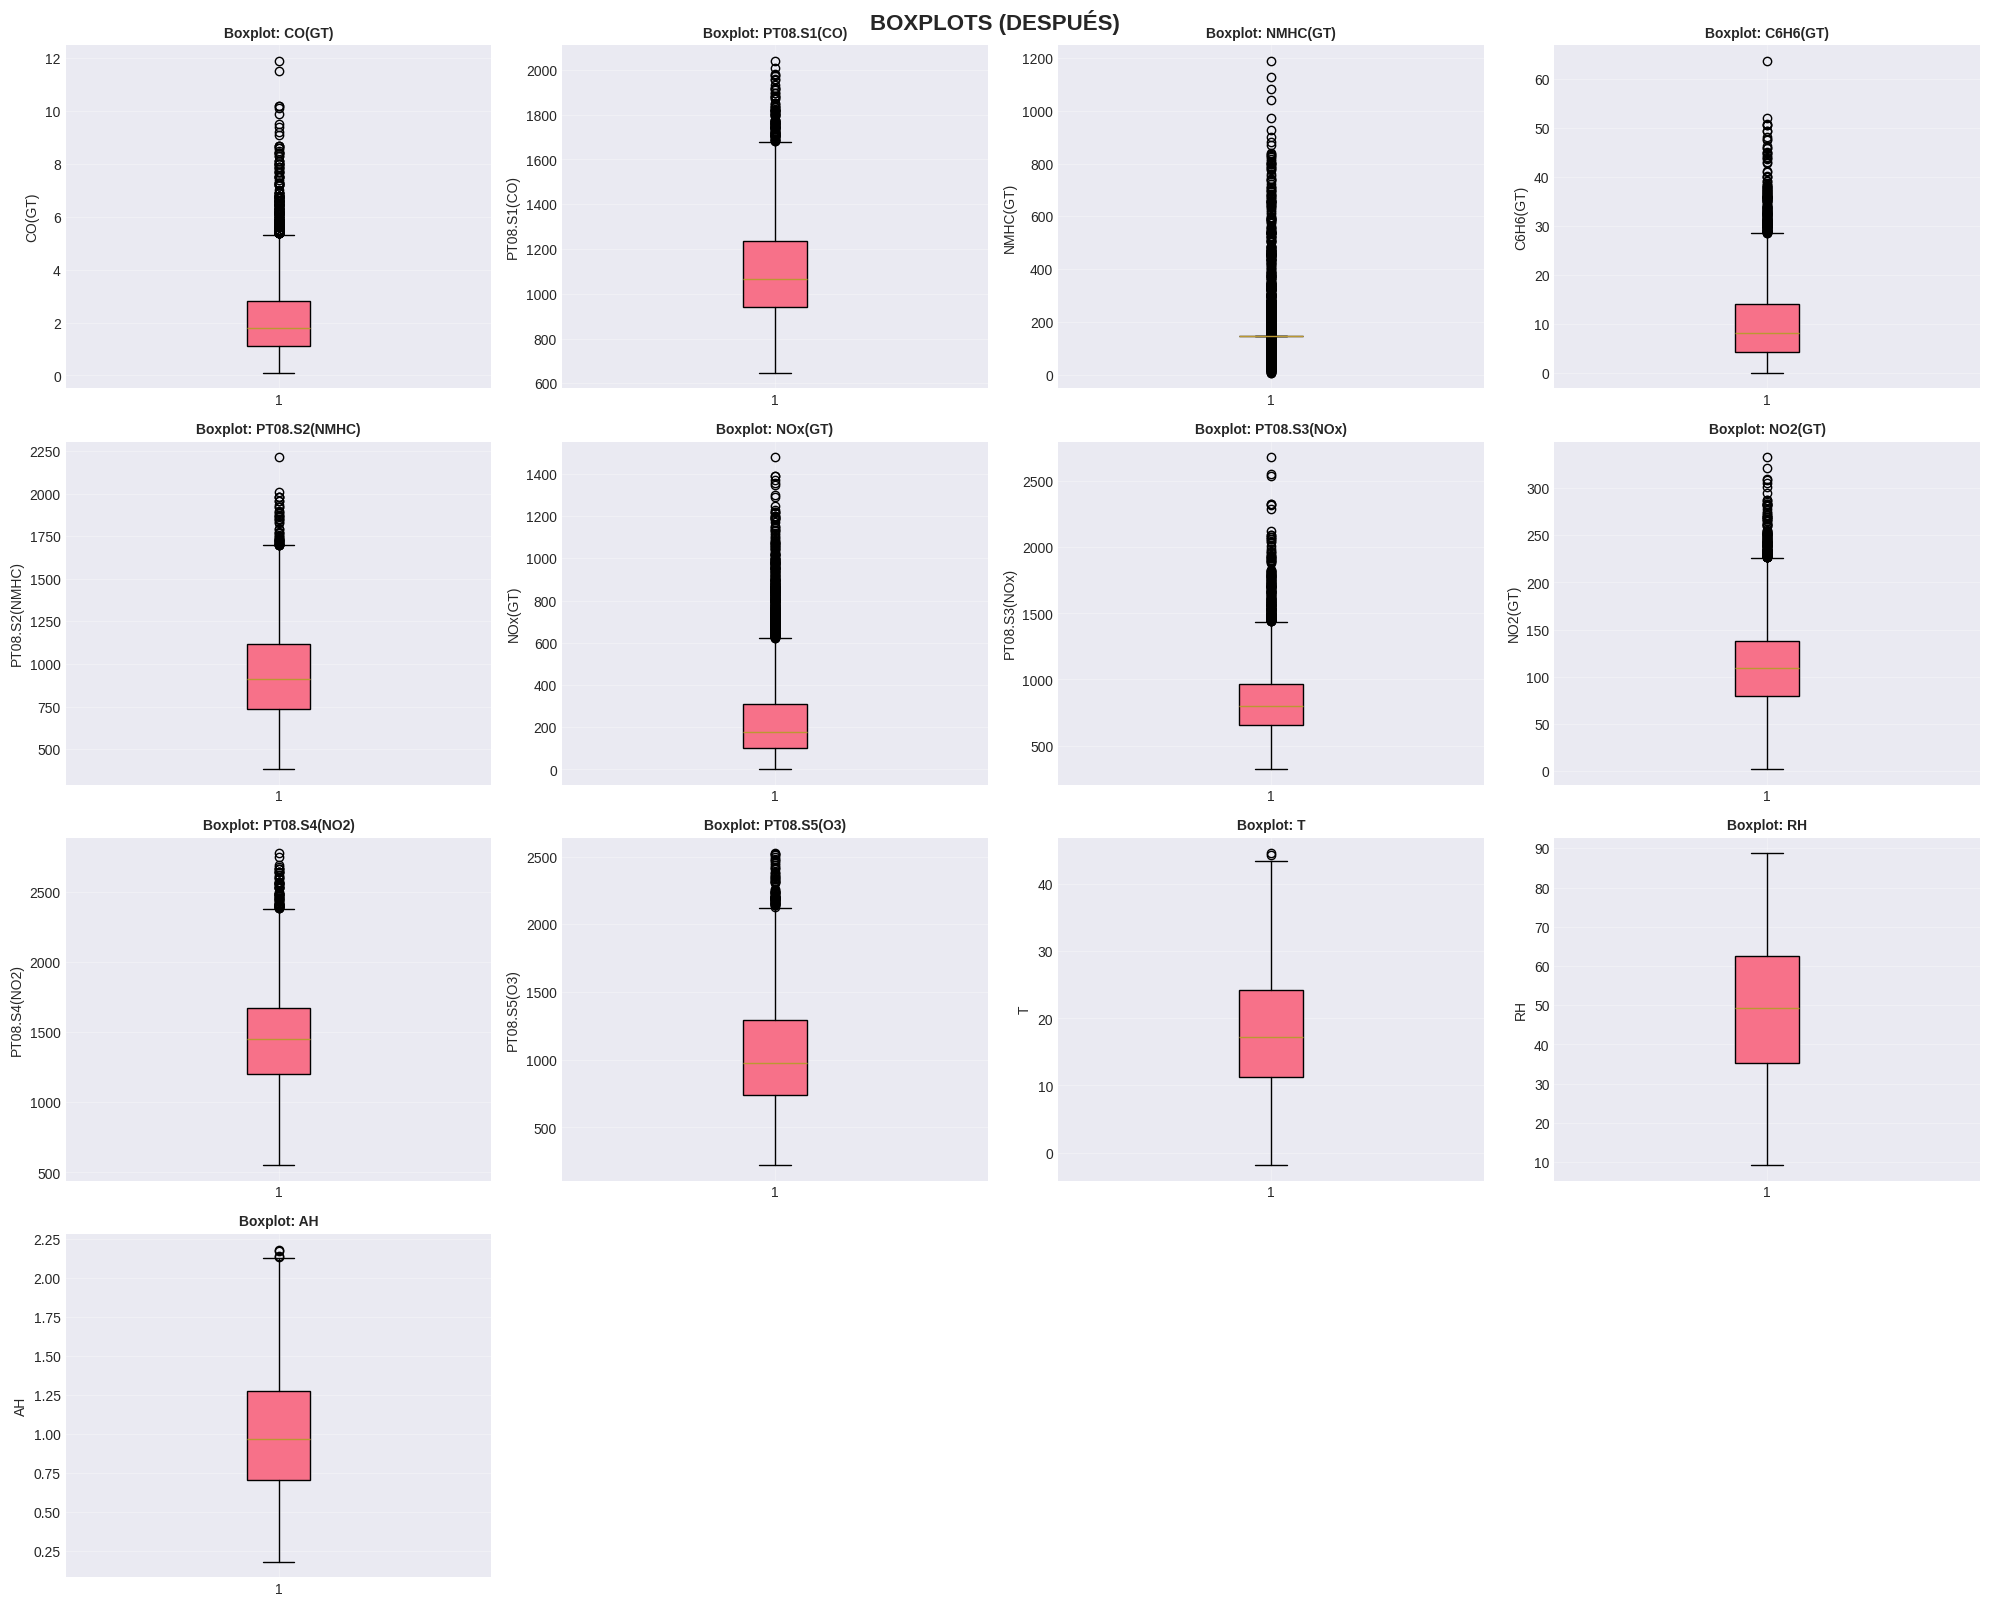


[9.4] Generando matriz de correlación (después)...


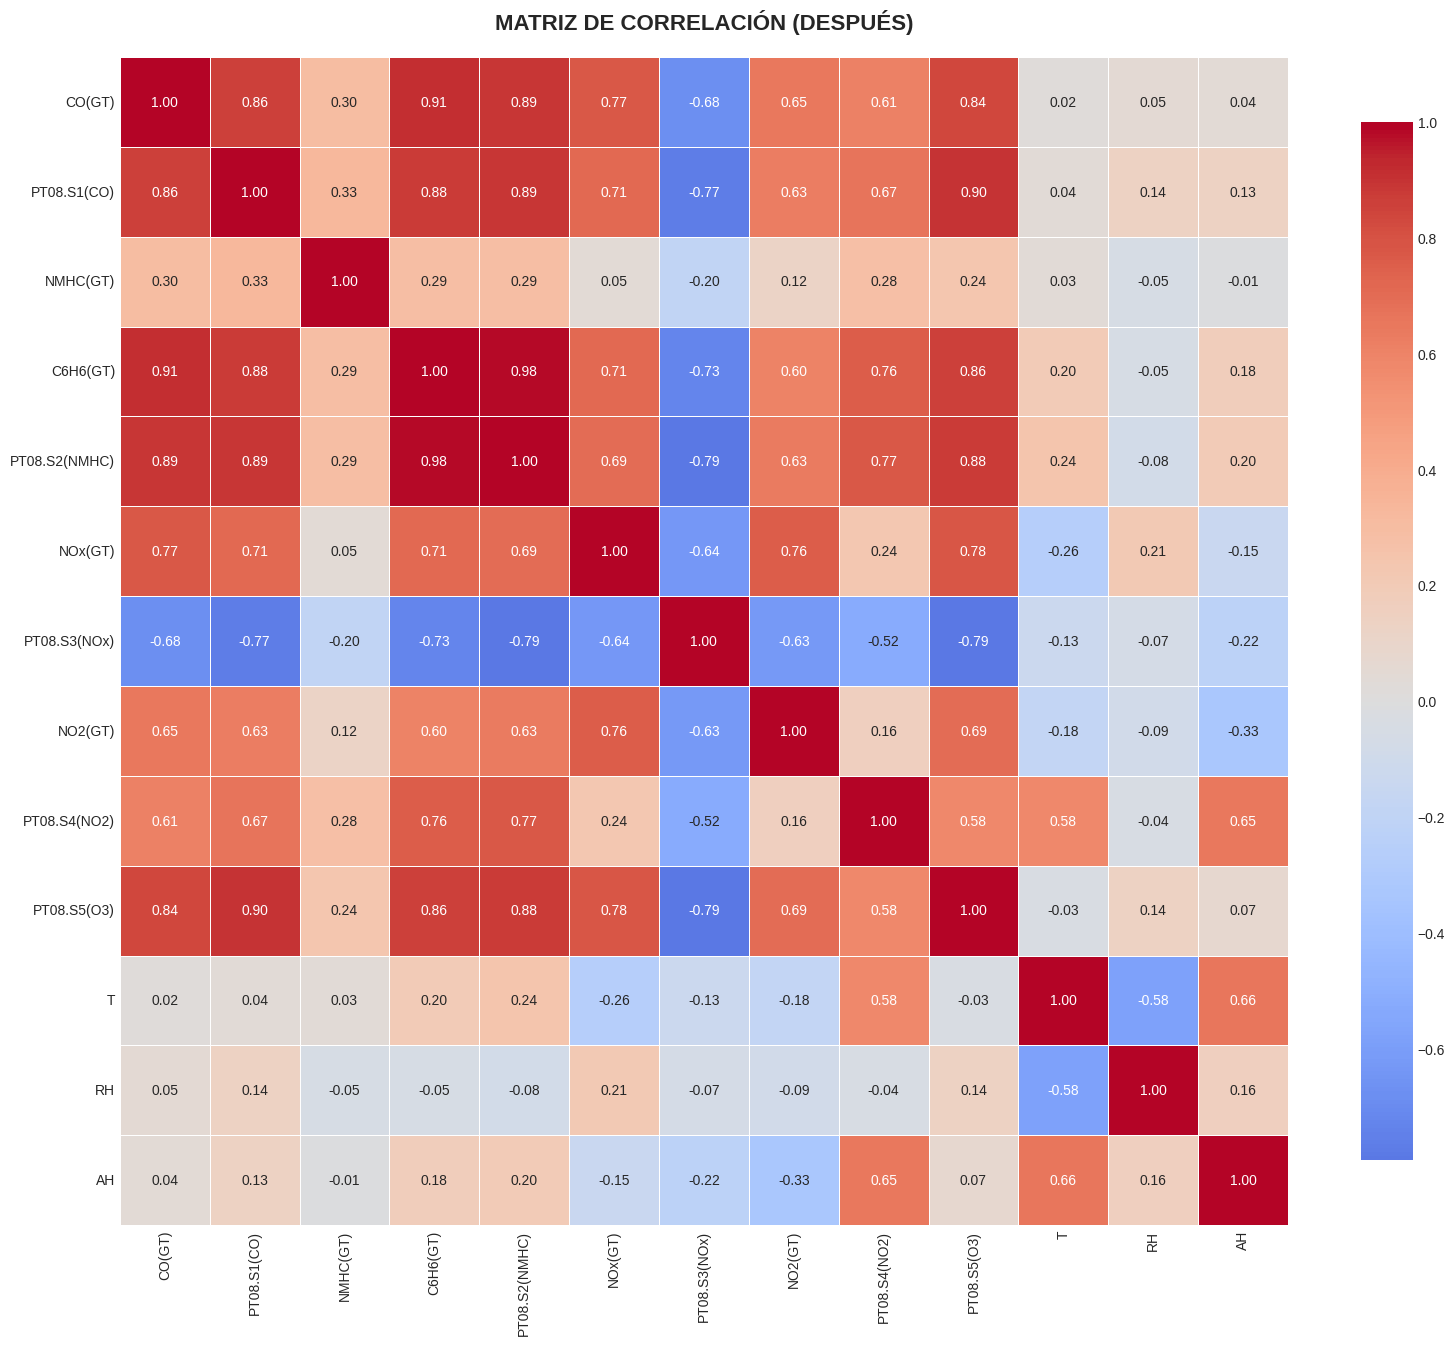


[9.5] Generando pairplot (después)...


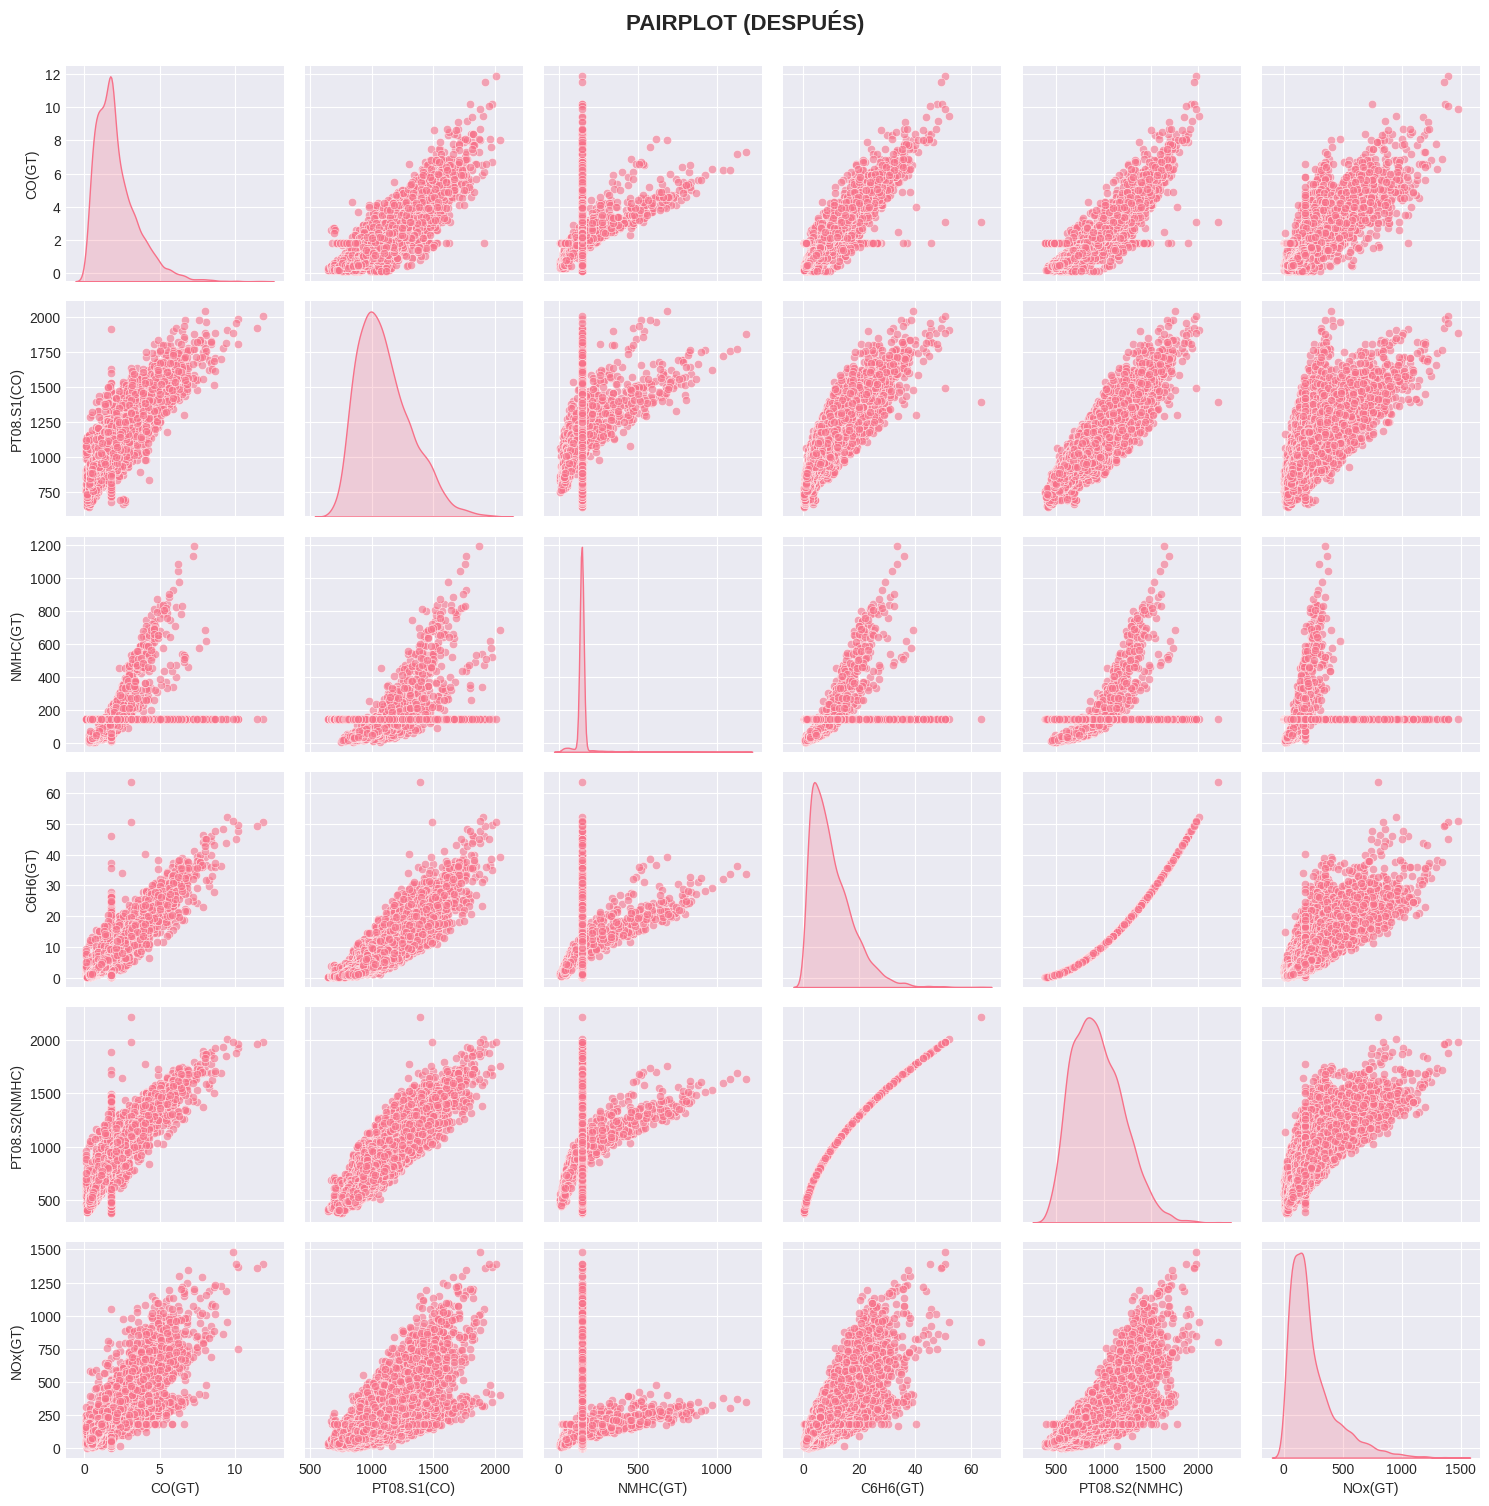


[9.6] Realizando pruebas de normalidad (después)...

Resultados de Pruebas de Normalidad (Después):
      Columna Shapiro_W  Shapiro_p Normal_SW KS_stat        KS_p Normal_KS
       CO(GT)    0.8988 2.0788e-49         ✗  0.1288 2.9725e-113         ✗
  PT08.S1(CO)    0.9626 4.1310e-34         ✗  0.0673  3.7284e-31         ✗
     NMHC(GT)    0.2836 4.0488e-88         ✗  0.4885  0.0000e+00         ✗
     C6H6(GT)    0.9005 3.9212e-49         ✗  0.1015  2.0912e-70         ✗
PT08.S2(NMHC)    0.9786 8.6997e-27         ✗  0.0461  7.7948e-15         ✗
      NOx(GT)    0.8330 3.1706e-58         ✗  0.1541 3.6383e-162         ✗
 PT08.S3(NOx)    0.9415 1.2928e-40         ✗  0.0685  3.3053e-32         ✗
      NO2(GT)    0.9792 1.9946e-26         ✗  0.0615  4.7125e-26         ✗
 PT08.S4(NO2)    0.9943 3.3067e-13         ✗  0.0200  3.7591e-03         ✗
  PT08.S5(O3)    0.9723 4.7520e-30         ✗  0.0577  5.2247e-23         ✗
            T    0.9811 2.5651e-25         ✗  0.0464  4.9078e-15         ✗

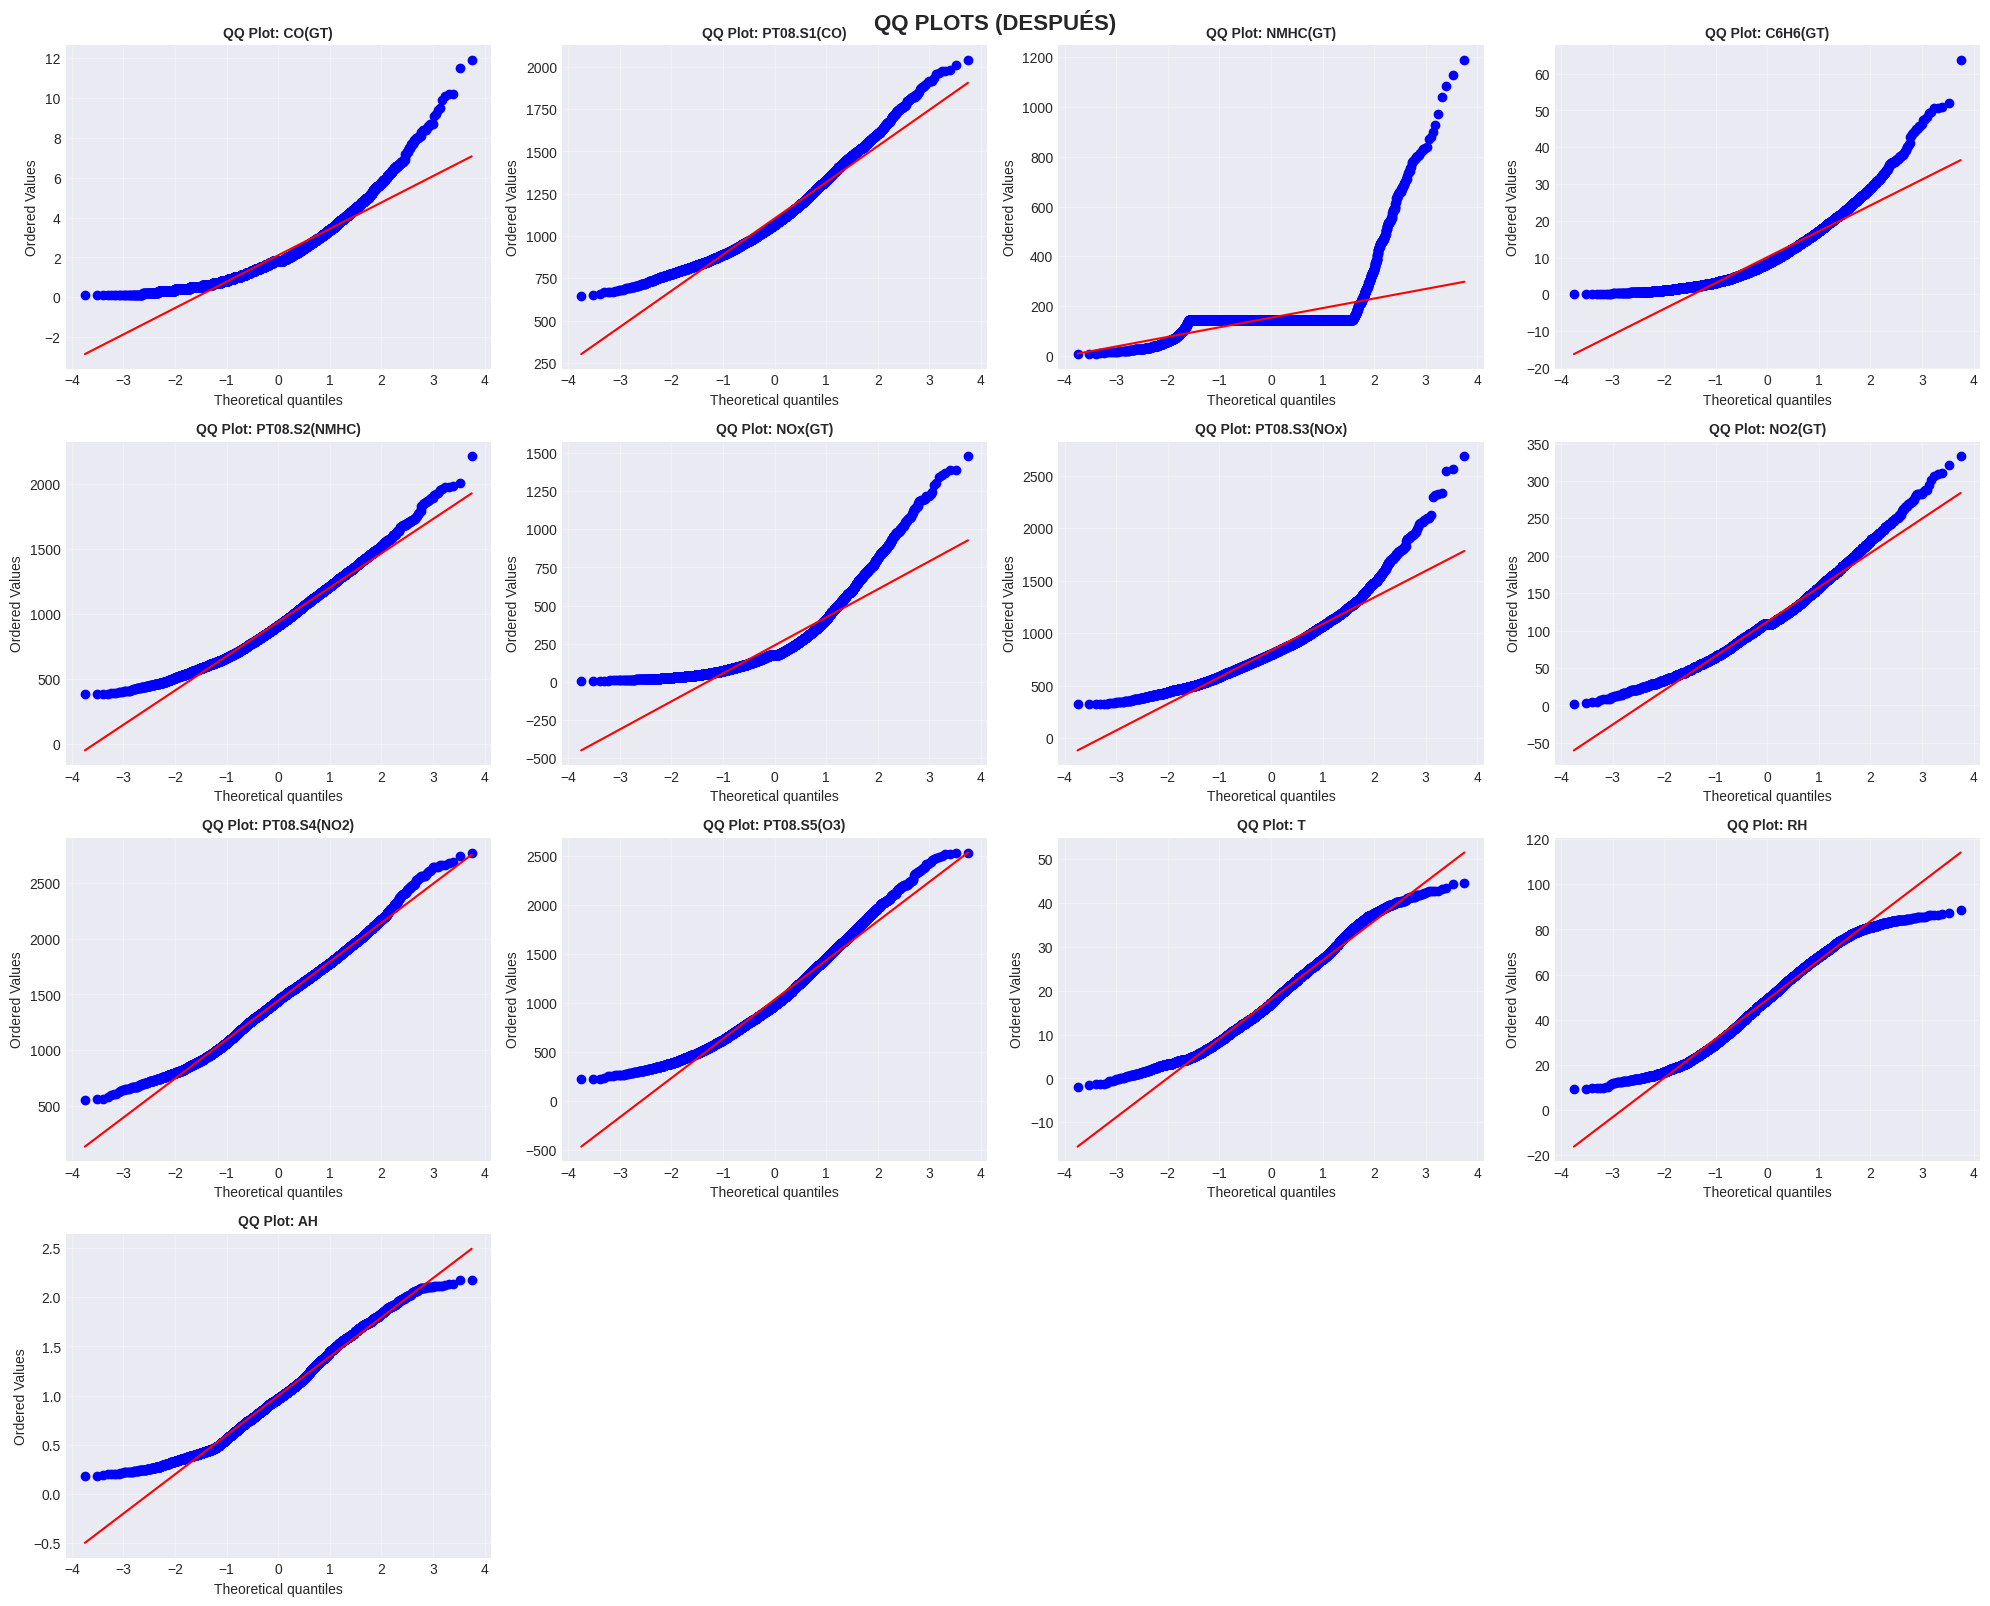


COMPARACIÓN: ANTES VS DESPUÉS DEL TRATAMIENTO

                   Métrica  Antes Después
          Número de Filas   9471    7796
Valores Faltantes Totales  18639       0
      Porcentaje Completo 88.42% 100.00%


Comparación de Medias (Antes vs Después):
      Columna  Media_Antes  Media_Después  Diferencia  Diferencia_%
       CO(GT)     2.152750       2.110595   -0.042154     -1.958164
  PT08.S1(CO)  1099.833166    1103.733581    3.900415      0.354637
     NMHC(GT)   218.811816     153.374808  -65.437009    -29.905610
     C6H6(GT)    10.083105      10.111775    0.028670      0.284336
PT08.S2(NMHC)   939.153376     940.374936    1.221560      0.130070
      NOx(GT)   246.896735     238.895844   -8.000891     -3.240582
 PT08.S3(NOx)   835.493605     833.622242   -1.871363     -0.223983
      NO2(GT)   113.091251     111.982555   -1.108696     -0.980355
 PT08.S4(NO2)  1456.264598    1444.605952  -11.658646     -0.800586
  PT08.S5(O3)  1022.906128    1032.922781   10.016653      0.97

In [52]:

# ============================================================================
print("\n" + "=" * 80)
print("EDA DESPUÉS DEL TRATAMIENTO DE DATOS FALTANTES")
print("=" * 80)

# --- ESTADÍSTICAS DESCRIPTIVAS (DESPUÉS) ---
print("\nESTADÍSTICAS DESCRIPTIVAS (DESPUÉS DEL TRATAMIENTO):")
print(df_treated.describe().T)

# --- HISTOGRAMAS Y DENSIDAD (DESPUÉS) ---
print("\n[9.2] Generando histogramas y gráficas de densidad (después)...")

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns):
    axes[idx].hist(df_treated[col], bins=50, edgecolor='black', alpha=0.7, density=True)

    try:
        df_treated[col].plot(kind='kde', ax=axes[idx], secondary_y=True, color='red', linewidth=2)
        axes[idx].right_ax.set_ylabel('Densidad', color='red')
    except:
        pass

    axes[idx].set_title(f'Histograma y PDF: {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(alpha=0.3)

for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('HISTOGRAMAS Y GRÁFICAS DE DENSIDAD (DESPUÉS)', fontsize=16, y=1.001, fontweight='bold')
plt.show()

# --- BOXPLOTS (DESPUÉS) ---
print("\n[9.3] Generando boxplots (después)...")

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns):
    axes[idx].boxplot(df_treated[col], vert=True, patch_artist=True)
    axes[idx].set_title(f'Boxplot: {col}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(alpha=0.3)

for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('BOXPLOTS (DESPUÉS)', fontsize=16, y=1.001, fontweight='bold')
plt.show()

# --- MATRIZ DE CORRELACIÓN (DESPUÉS) ---
print("\n[9.4] Generando matriz de correlación (después)...")

correlation_matrix_after = df_treated[numeric_columns].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix_after, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('MATRIZ DE CORRELACIÓN (DESPUÉS)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# --- PAIRPLOT (DESPUÉS) ---
print("\n[9.5] Generando pairplot (después)...")

pairplot_data_after = df_treated[selected_vars]
sns.pairplot(pairplot_data_after, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('PAIRPLOT (DESPUÉS)', y=1.001, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# --- PRUEBAS DE NORMALIDAD (DESPUÉS) ---
print("\n[9.6] Realizando pruebas de normalidad (después)...")

normality_results_after = []

for col in numeric_columns:
    data = df_treated[col]

    if len(data) <= 5000:
        stat_sw, p_sw = shapiro(data)
    else:
        sample_data = data.sample(n=5000, random_state=42)
        stat_sw, p_sw = shapiro(sample_data)

    result_ad = anderson(data, dist='norm')
    stat_ks, p_ks = kstest(data, 'norm', args=(data.mean(), data.std()))

    normality_results_after.append({
        'Columna': col,
        'Shapiro_W': f"{stat_sw:.4f}",
        'Shapiro_p': f"{p_sw:.4e}",
        'Normal_SW': '✓' if p_sw > 0.05 else '✗',
        'KS_stat': f"{stat_ks:.4f}",
        'KS_p': f"{p_ks:.4e}",
        'Normal_KS': '✓' if p_ks > 0.05 else '✗'
    })

normality_df_after = pd.DataFrame(normality_results_after)
print("\nResultados de Pruebas de Normalidad (Después):")
print(normality_df_after.to_string(index=False))

# ---  QQ PLOTS (DESPUÉS) ---
print("\n Generando QQ plots (después)...")

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns):
    stats.probplot(df_treated[col], dist="norm", plot=axes[idx])
    axes[idx].set_title(f'QQ Plot: {col}', fontsize=10, fontweight='bold')
    axes[idx].grid(alpha=0.3)

for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('QQ PLOTS (DESPUÉS)', fontsize=16, y=1.001, fontweight='bold')
plt.show()

# ============================================================================
# COMPARACIÓN ANTES VS DESPUÉS
# ============================================================================
print("\n" + "=" * 80)
print("COMPARACIÓN: ANTES VS DESPUÉS DEL TRATAMIENTO")
print("=" * 80)

comparison_stats = pd.DataFrame({
    'Métrica': ['Número de Filas', 'Valores Faltantes Totales', 'Porcentaje Completo'],
    'Antes': [
        len(df_original),
        df_original.isnull().sum().sum(),
        f"{((1 - df_original.isnull().sum().sum() / df_original.size) * 100):.2f}%"
    ],
    'Después': [
        len(df_treated),
        df_treated.isnull().sum().sum(),
        f"{((1 - df_treated.isnull().sum().sum() / df_treated.size) * 100):.2f}%"
    ]
})

print("\n", comparison_stats.to_string(index=False))

# Comparación de estadísticas descriptivas
print("\n\nComparación de Medias (Antes vs Después):")
mean_comparison = pd.DataFrame({
    'Columna': numeric_columns,
    'Media_Antes': [df_original[col].mean() for col in numeric_columns],
    'Media_Después': [df_treated[col].mean() for col in numeric_columns],
    'Diferencia': [df_treated[col].mean() - df_original[col].mean() for col in numeric_columns],
    'Diferencia_%': [((df_treated[col].mean() - df_original[col].mean()) / df_original[col].mean() * 100)
                     if df_original[col].mean() != 0 else 0 for col in numeric_columns]
})
print(mean_comparison.to_string(index=False))